# Vehicle Insurance Claim Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing Data

In [2]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
vic.shape

(15420, 33)

In [4]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [5]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [9]:
vic_temp = vic.copy()

In [10]:
vic_temp[vic_temp['Age'] == 0].shape

(320, 33)

In [11]:
vic_temp[vic_temp['Age'] == 0]['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [12]:
# Because 320 of the samples have an age of zero, we fill them with the mean of 16 and 17
vic_temp['Age'] = vic_temp['Age'].replace(0, 16.5)

In [13]:
vic_temp[vic_temp['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [14]:
# Because Day Of Week Claimed and Month Claimed of above sample is 0 we remove it.
vic_temp.drop(1516, axis=0, inplace=True)
vic_temp.shape

(15419, 33)

In [15]:
vic_temp['PolicyNumber'].value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5146     1
5147     1
5148     1
5149     1
15420    1
Name: PolicyNumber, Length: 15419, dtype: int64

In [16]:
# Beacuse Policy number is a row number remove this column
vic_temp.drop(columns='PolicyNumber', inplace=True)
vic_temp.shape

(15419, 32)

In [17]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.007719,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001411,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.007719,0.001411,1.000000,-0.027509,-0.006357,0.069036,0.001264,0.022278
FraudFound_P,-0.011872,-0.005783,-0.027509,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.006357,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.069036,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.001264,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.022278,-0.024778,0.009438,-0.001182,-0.013922,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_20077/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

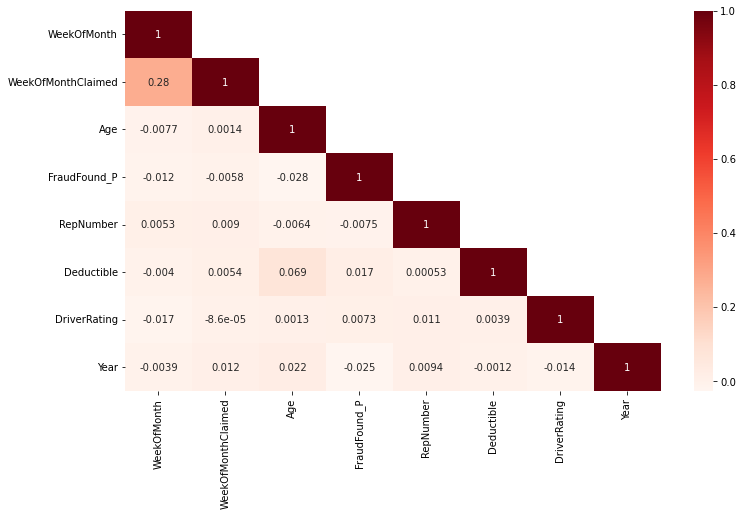

In [18]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [19]:
for labels, content in vic_temp.items():
    if pd.api.types.is_string_dtype(content):
        vic_temp[labels] = content.astype('category').cat.as_ordered()

In [20]:
vic_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15419 non-null  category
 1   WeekOfMonth           15419 non-null  int64   
 2   DayOfWeek             15419 non-null  category
 3   Make                  15419 non-null  category
 4   AccidentArea          15419 non-null  category
 5   DayOfWeekClaimed      15419 non-null  category
 6   MonthClaimed          15419 non-null  category
 7   WeekOfMonthClaimed    15419 non-null  int64   
 8   Sex                   15419 non-null  category
 9   MaritalStatus         15419 non-null  category
 10  Age                   15419 non-null  float64 
 11  Fault                 15419 non-null  category
 12  PolicyType            15419 non-null  category
 13  VehicleCategory       15419 non-null  category
 14  VehiclePrice          15419 non-null  category
 15  Fr

In [21]:
for labels, content in vic_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        vic_temp[labels] = pd.Categorical(content).codes

In [22]:
vic_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [23]:
vic_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,15419.0,5.532136,3.409703,0.0,3.0,6.0,8.0,11.0
WeekOfMonth,15419.0,2.788637,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,2.915883,2.055494,0.0,1.0,3.0,5.0,6.0
Make,15419.0,10.114858,5.282987,0.0,6.0,9.0,13.0,18.0
AccidentArea,15419.0,0.896426,0.304716,0.0,1.0,1.0,1.0,1.0
DayOfWeekClaimed,15419.0,3.203061,2.273766,0.0,1.0,4.0,5.0,6.0
MonthClaimed,15419.0,5.596148,3.410648,0.0,3.0,6.0,9.0,11.0
WeekOfMonthClaimed,15419.0,2.694079,1.259082,1.0,2.0,3.0,4.0,5.0
Sex,15419.0,0.843051,0.363765,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15419.0,1.303327,0.475113,0.0,1.0,1.0,2.0,3.0


In [24]:
corr_mat = vic_temp.corr()
corr_mat

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010625,-0.009549,0.000539,-0.000074,-0.025776,0.724419,0.042016,0.002916,-0.003956,...,-0.029181,0.010748,0.009986,-0.002107,0.015757,-0.010878,-0.007517,0.001341,0.028726,0.020484
WeekOfMonth,0.010625,1.000000,-0.011668,-0.001665,0.009002,0.015082,0.009982,0.275366,0.005332,0.019671,...,-0.014871,-0.002898,0.013020,0.013711,0.006472,-0.002867,0.008338,0.002511,-0.003949,-0.007818
DayOfWeek,-0.009549,-0.011668,1.000000,0.003321,0.006386,0.097647,-0.011997,-0.013954,-0.021214,-0.006547,...,0.004027,0.013165,-0.011908,0.000134,0.011516,-0.010873,-0.005148,0.001991,0.002549,0.014810
Make,0.000539,-0.001665,0.003321,1.000000,0.004127,-0.005187,0.010022,-0.007900,-0.026360,-0.010574,...,-0.052875,0.051961,-0.008083,-0.000490,-0.014913,-0.025168,-0.003390,-0.000226,0.010826,-0.019937
AccidentArea,-0.000074,0.009002,0.006386,0.004127,1.000000,-0.011394,-0.002618,0.006330,-0.033732,0.003321,...,-0.012278,0.007301,0.001722,-0.028385,-0.005214,0.005229,0.003755,-0.007856,0.002079,0.043560
DayOfWeekClaimed,-0.025776,0.015082,0.097647,-0.005187,-0.011394,1.000000,-0.015803,0.013635,-0.000203,-0.018055,...,-0.006408,0.008432,-0.018389,-0.001396,-0.015393,0.019484,0.011260,-0.010448,0.003512,-0.014472
MonthClaimed,0.724419,0.009982,-0.011997,0.010022,-0.002618,-0.015803,1.000000,0.032428,-0.002160,-0.007772,...,-0.021446,0.018572,0.013989,-0.008597,0.016148,0.001483,-0.013373,-0.001811,0.020948,0.028162
WeekOfMonthClaimed,0.042016,0.275366,-0.013954,-0.007900,0.006330,0.013635,0.032428,1.000000,0.003777,0.000411,...,0.004001,0.001091,0.023497,0.009363,-0.011326,-0.007022,-0.008322,0.008224,0.012082,0.013671
Sex,0.002916,0.005332,-0.021214,-0.026360,-0.033732,-0.000203,-0.002160,0.003777,1.000000,-0.114441,...,0.209081,0.065569,-0.007408,-0.005583,0.012685,0.001927,0.004429,0.000089,0.000444,-0.069729
MaritalStatus,-0.003956,0.019671,-0.006547,-0.010574,0.003321,-0.018055,-0.007772,0.000411,-0.114441,1.000000,...,-0.304444,-0.453924,0.011780,0.013870,0.007592,0.016658,-0.009557,-0.008284,-0.013893,0.048131


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_20077/1290100022.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

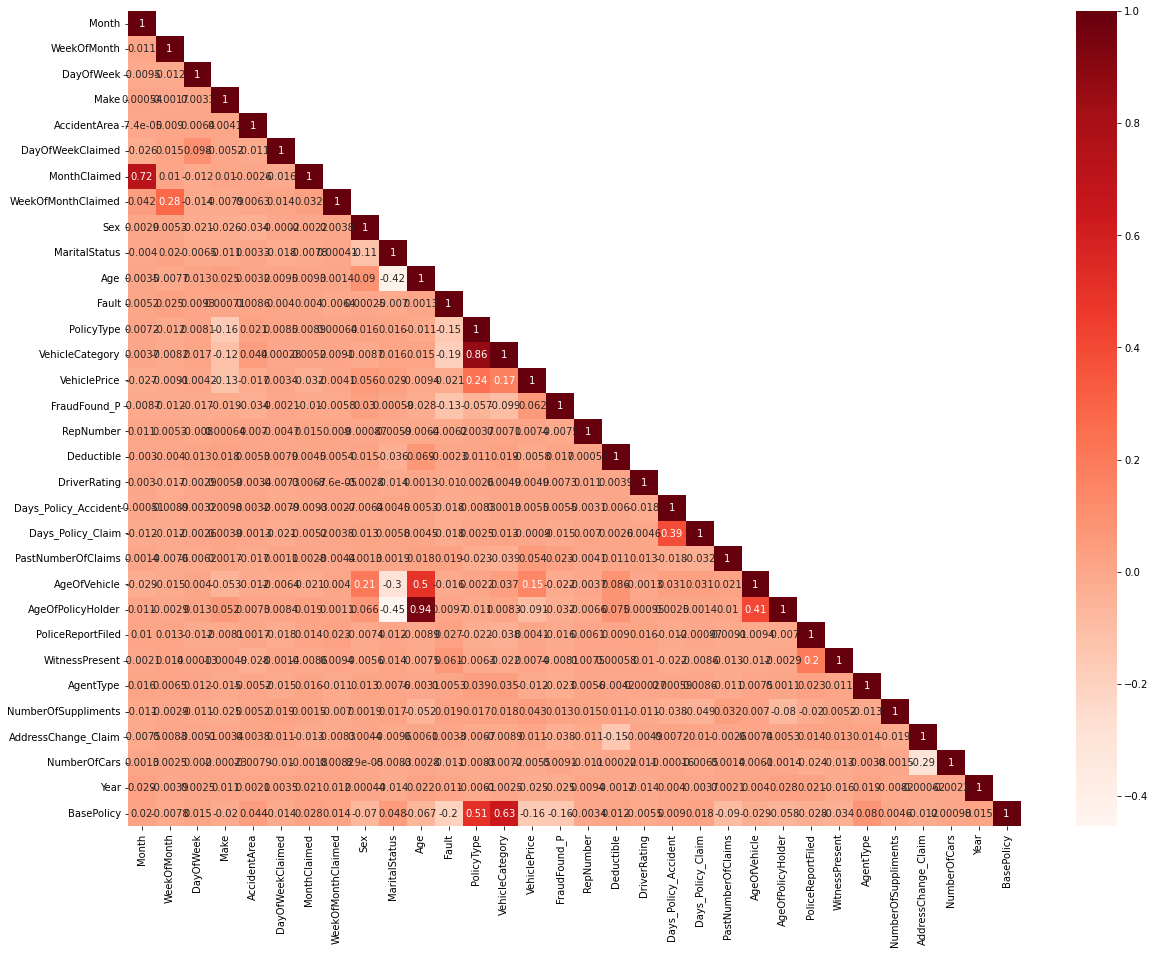

In [25]:
plt.figure(figsize=(20, 15))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

### Spliting Data

In [26]:
X = vic_temp.drop(columns='FraudFound_P').copy()
y = vic_temp['FraudFound_P'].copy()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [28]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12335, 31) (3084, 31) (12335,) (3084,)


In [29]:
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

In [30]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

#### Functions for Analysis a Model

In [31]:
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_test, y_pred))

In [33]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []

In [34]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_train, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_train, y_pred))

### Training Model Without under and over sampling

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [36]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


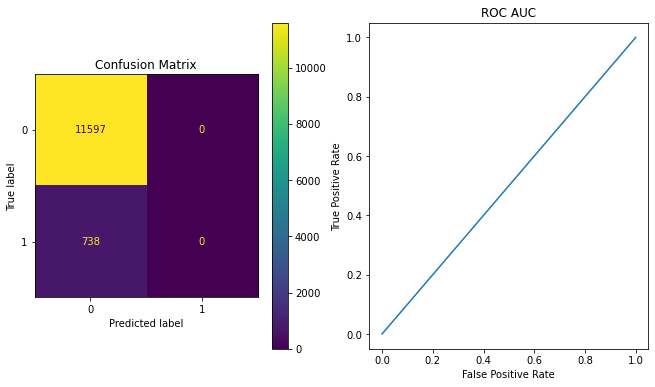

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
analysis_model_with_train('logistic_model', logistic_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


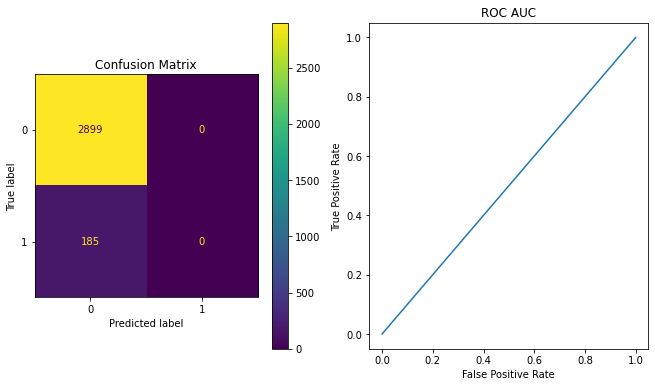

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
analysis_model_with_test('logistic_model', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [36]:
from sklearn.svm import LinearSVC
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [40]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


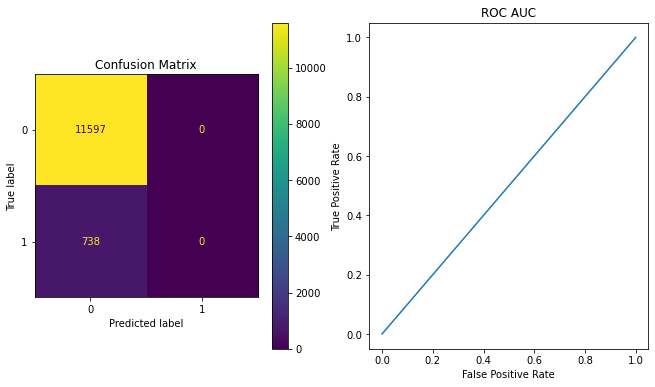

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
analysis_model_with_train('linearSVC_model', linearSVC_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


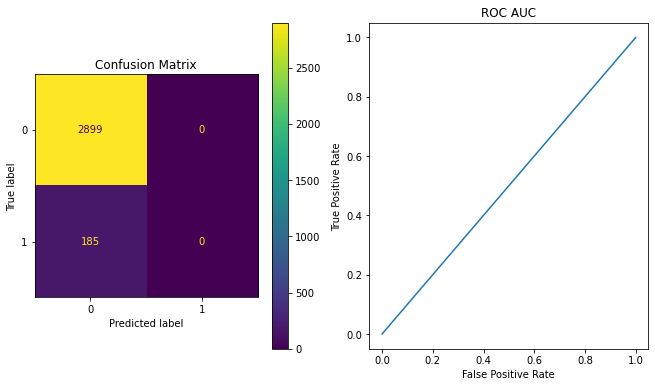

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
analysis_model_with_test('linearSVC_model', linearSVC_model, x_test, y_test)

#### SVC

In [37]:
from sklearn.svm import SVC
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [44]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9588974462910418
F1 Score: 0.47893114080164434
Recall Score: 0.3157181571815718
Precision Score: 0.9914893617021276
ROC AUC: 0.6577728493935797


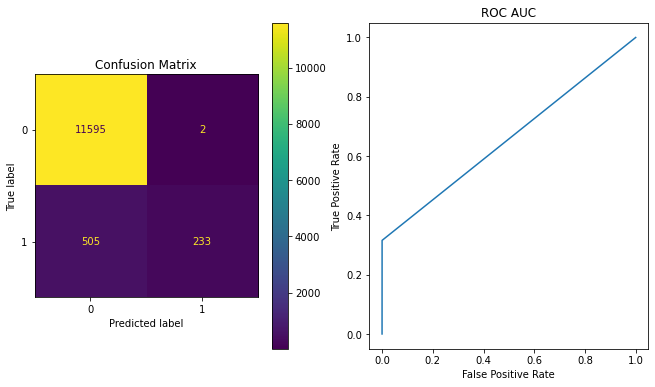

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11597
           1       0.99      0.32      0.48       738

    accuracy                           0.96     12335
   macro avg       0.97      0.66      0.73     12335
weighted avg       0.96      0.96      0.95     12335



In [45]:
analysis_model_with_train('poly_kernel_svm_clf', poly_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9309338521400778
F1 Score: 0.11618257261410789
Recall Score: 0.07567567567567568
Precision Score: 0.25
ROC AUC: 0.5305939606388038


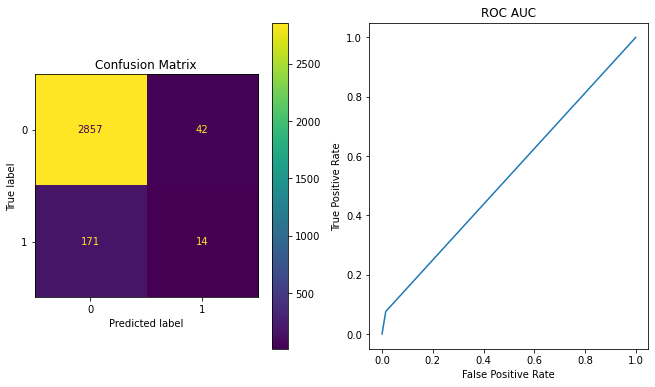

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2899
           1       0.25      0.08      0.12       185

    accuracy                           0.93      3084
   macro avg       0.60      0.53      0.54      3084
weighted avg       0.90      0.93      0.91      3084



In [46]:
analysis_model_with_test('poly_kernel_svm_clf', poly_kernel_svm_clf, x_test, y_test)

In [47]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [48]:
rbf_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.941305229023105
F1 Score: 0.03723404255319149
Recall Score: 0.018970189701897018
Precision Score: 1.0
ROC AUC: 0.5094850948509485


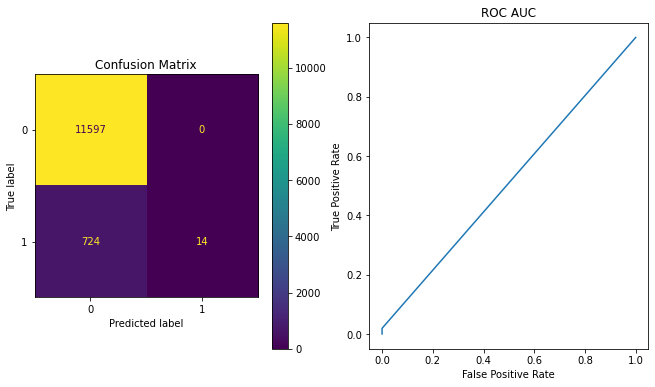

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       1.00      0.02      0.04       738

    accuracy                           0.94     12335
   macro avg       0.97      0.51      0.50     12335
weighted avg       0.94      0.94      0.91     12335



In [49]:
analysis_model_with_train('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


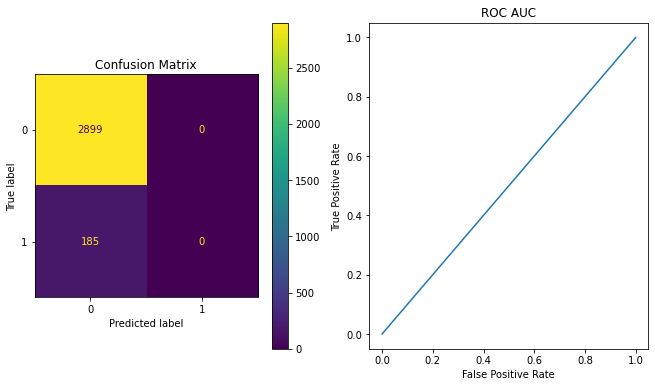

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
analysis_model_with_test('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_test, y_test)

### Training Model with Under Sampling

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [39]:
under_sampler = Pipeline([('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5))])
x_under, y_under = under_sampler.fit_resample(x_train, y_train)
print(x_under.shape, y_under.shape)

(3477, 31) (3477,)


In [40]:
y_under.value_counts()

0    2318
1    1159
Name: FraudFound_P, dtype: int64

In [41]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

#### Logistic Regression

In [42]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [43]:
logistic_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.7581248202473396
F1 Score: 0.6280406899601947
Recall Score: 0.6125970664365833
Precision Score: 0.6442831215970962
ROC AUC: 0.7217428817946506


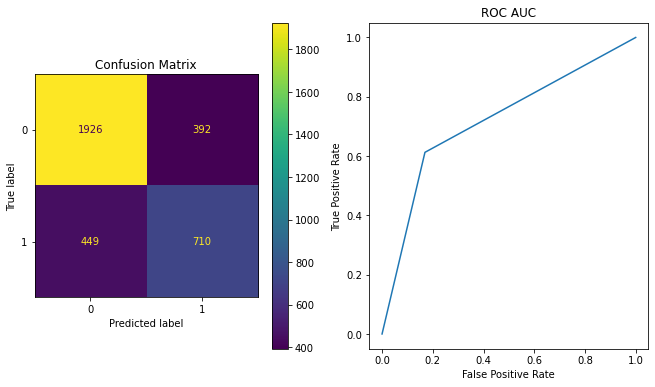

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2318
           1       0.64      0.61      0.63      1159

    accuracy                           0.76      3477
   macro avg       0.73      0.72      0.72      3477
weighted avg       0.76      0.76      0.76      3477



In [44]:
analysis_model_with_train('logistic_model_under', logistic_model, x_under, y_under)

Accuracy Score: 0.8035019455252919
F1 Score: 0.23291139240506328
Recall Score: 0.4972972972972973
Precision Score: 0.15206611570247933
ROC AUC: 0.6601698628604459


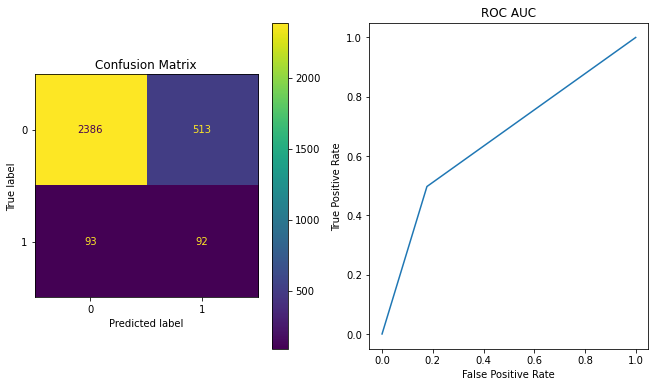

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2899
           1       0.15      0.50      0.23       185

    accuracy                           0.80      3084
   macro avg       0.56      0.66      0.56      3084
weighted avg       0.91      0.80      0.85      3084



In [45]:
analysis_model_with_test('logistic_model_under', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [37]:
from sklearn.svm import LinearSVC

In [47]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [48]:
linearSVC_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7587000287604256
F1 Score: 0.6331438565806733
Recall Score: 0.6246764452113891
Precision Score: 0.6418439716312057
ROC AUC: 0.7251941328731665


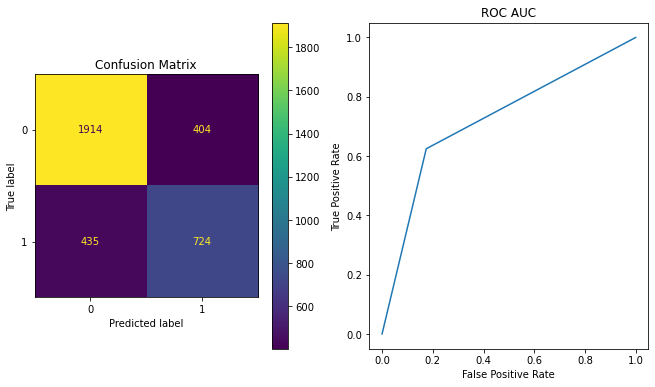

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2318
           1       0.64      0.62      0.63      1159

    accuracy                           0.76      3477
   macro avg       0.73      0.73      0.73      3477
weighted avg       0.76      0.76      0.76      3477



In [49]:
analysis_model_with_train('linearSVC_model_under', linearSVC_model, x_under, y_under)

Accuracy Score: 0.8005836575875487
F1 Score: 0.23220973782771537
Recall Score: 0.5027027027027027
Precision Score: 0.15097402597402598
ROC AUC: 0.6611478328967118


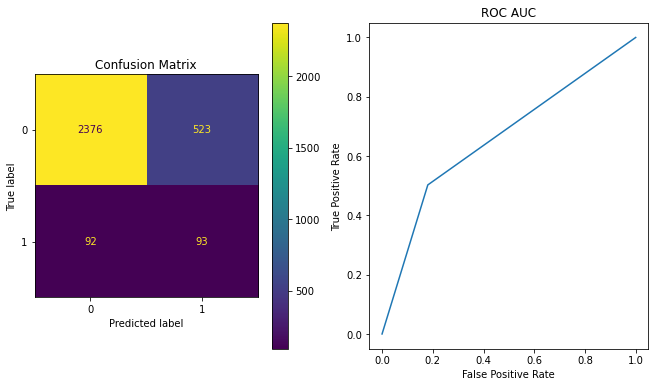

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2899
           1       0.15      0.50      0.23       185

    accuracy                           0.80      3084
   macro avg       0.56      0.66      0.56      3084
weighted avg       0.91      0.80      0.85      3084



In [50]:
analysis_model_with_test('linearSVC_model_under', linearSVC_model, x_test, y_test)

#### SVC

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [218]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=5))

In [219]:
poly_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='poly'))])

Accuracy Score: 0.9180327868852459
F1 Score: 0.87027765134274
Recall Score: 0.8248490077653149
Precision Score: 0.9210019267822736
ROC AUC: 0.8947368421052633


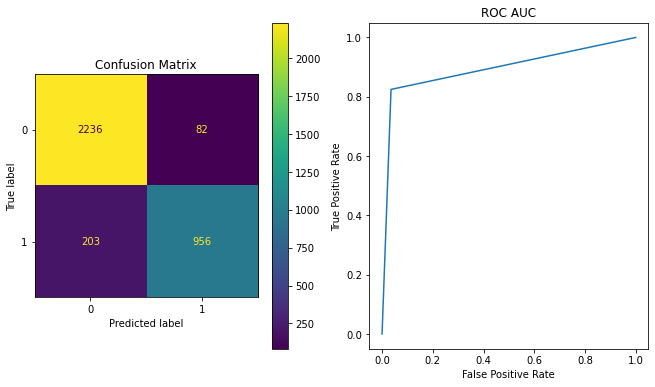

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2318
           1       0.92      0.82      0.87      1159

    accuracy                           0.92      3477
   macro avg       0.92      0.89      0.91      3477
weighted avg       0.92      0.92      0.92      3477



In [220]:
analysis_model_with_train('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.8206874189364461
F1 Score: 0.2244039270687237
Recall Score: 0.43243243243243246
Precision Score: 0.15151515151515152
ROC AUC: 0.638948192759852


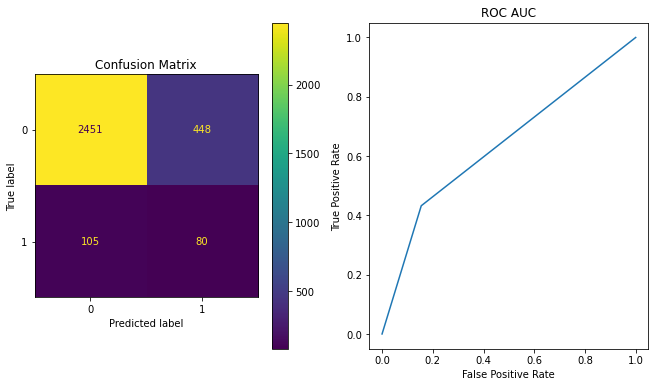

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2899
           1       0.15      0.43      0.22       185

    accuracy                           0.82      3084
   macro avg       0.56      0.64      0.56      3084
weighted avg       0.91      0.82      0.86      3084



In [221]:
analysis_model_with_test('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_test, y_test)

In [56]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))

In [57]:
rbf_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Accuracy Score: 0.8668392292205924
F1 Score: 0.7902129587675577
Recall Score: 0.7523727351164797
Precision Score: 0.8320610687022901
ROC AUC: 0.8382226056945643


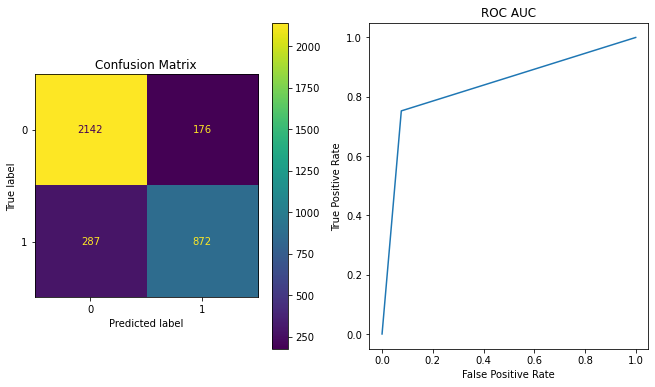

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2318
           1       0.83      0.75      0.79      1159

    accuracy                           0.87      3477
   macro avg       0.86      0.84      0.85      3477
weighted avg       0.87      0.87      0.87      3477



In [58]:
analysis_model_with_train('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.8485732814526589
F1 Score: 0.28483920367534454
Recall Score: 0.5027027027027027
Precision Score: 0.1987179487179487
ROC AUC: 0.686673876359975


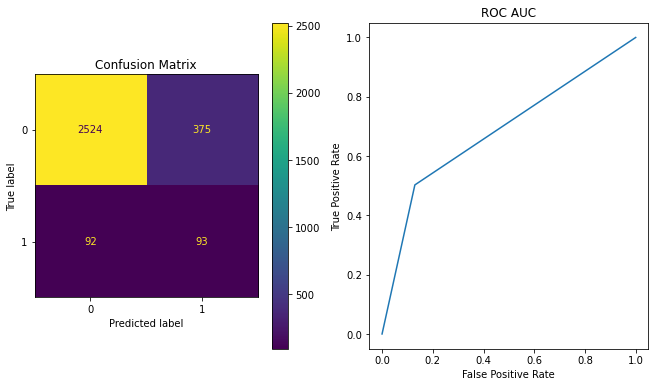

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2899
           1       0.20      0.50      0.28       185

    accuracy                           0.85      3084
   macro avg       0.58      0.69      0.60      3084
weighted avg       0.92      0.85      0.88      3084



In [59]:
analysis_model_with_test('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_test, y_test)

##### Grid Search Cv on RBF kernel

In [42]:
grid_parameters = {'C': [0.1, 1, 2, 3, 4, 5], 
                   'gamma': ['scale', 'auto', 0.1, 0.01],
                   'kernel': ['rbf']}

grid_search = GridSearchCV(estimator=SVC(), param_grid=grid_parameters, scoring='f1', cv=5)

In [43]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='f1')

In [44]:
grid_search.best_params_

{'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}

Accuracy Score: 0.999712395743457
F1 Score: 0.9995684074233924
Recall Score: 0.999137187230371
Precision Score: 1.0
ROC AUC: 0.9995685936151855


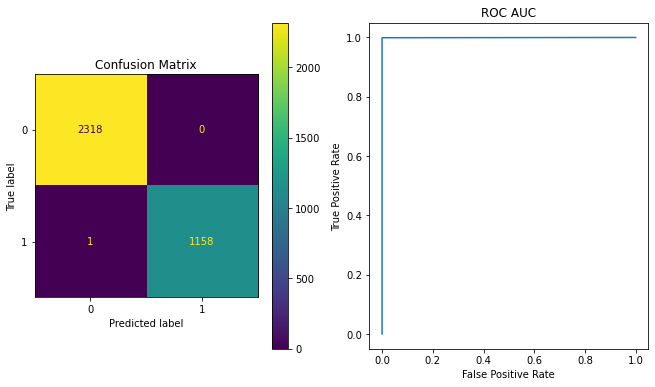

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [45]:
analysis_model_with_train('rbf_kernel_svm_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8706225680933852
F1 Score: 0.10738255033557048
Recall Score: 0.12972972972972974
Precision Score: 0.0916030534351145
ROC AUC: 0.5238162274036713


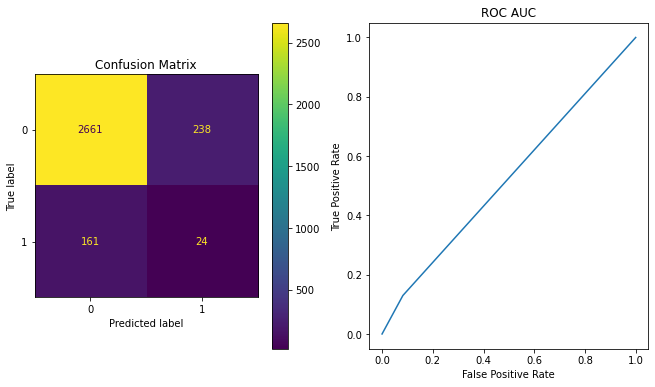

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2899
           1       0.09      0.13      0.11       185

    accuracy                           0.87      3084
   macro avg       0.52      0.52      0.52      3084
weighted avg       0.89      0.87      0.88      3084



In [46]:
analysis_model_with_test('rbf_kernel_svm_clf_under', grid_search.best_estimator_, x_test, y_test)

In [60]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', gamma='auto'))

In [61]:
sigmoid_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid'))])

Accuracy Score: 0.6850733390854185
F1 Score: 0.5135495335406486
Recall Score: 0.4987057808455565
Precision Score: 0.5293040293040293
ROC AUC: 0.6384814495254529


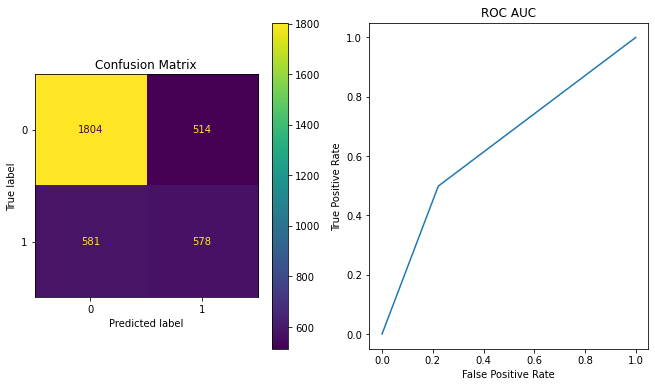

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2318
           1       0.53      0.50      0.51      1159

    accuracy                           0.69      3477
   macro avg       0.64      0.64      0.64      3477
weighted avg       0.68      0.69      0.68      3477



In [62]:
analysis_model_with_train('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.7808041504539559
F1 Score: 0.2009456264775414
Recall Score: 0.4594594594594595
Precision Score: 0.12859304084720122
ROC AUC: 0.6303851281429756


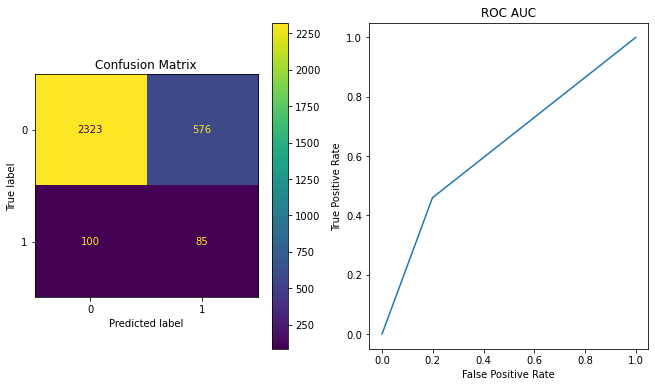

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2899
           1       0.13      0.46      0.20       185

    accuracy                           0.78      3084
   macro avg       0.54      0.63      0.54      3084
weighted avg       0.91      0.78      0.83      3084



In [63]:
analysis_model_with_test('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_test, y_test)

#### Grid Search CV on SVM

In [202]:
svm_model = SVC()

In [213]:
grid_parameters = {'C': [0.1, 1, 2, 3, 4, 5], 
                   'gamma': ['auto'],
                   'kernel': ['rbf', 'linear']}

grid_search = GridSearchCV(estimator=svm_model, param_grid=grid_parameters, scoring='f1', cv=5)

In [214]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5], 'gamma': ['auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='f1')

In [215]:
grid_search.best_params_

{'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}

Accuracy Score: 0.998849582973828
F1 Score: 0.9982728842832469
Recall Score: 0.997411561691113
Precision Score: 0.9991356957649092
ROC AUC: 0.9984900776531492


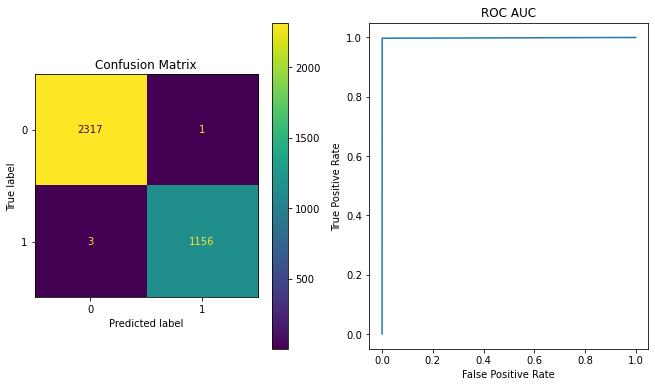

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [216]:
analysis_model_with_train('rbf_kernel_svm_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8660830090791181
F1 Score: 0.11940298507462688
Recall Score: 0.15135135135135136
Precision Score: 0.09859154929577464
ROC AUC: 0.5315225194148961


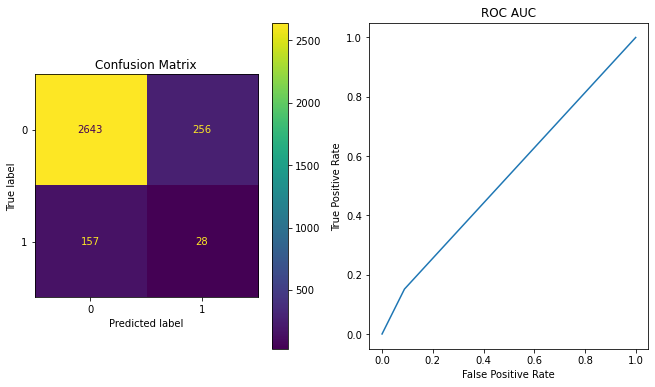

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2899
           1       0.10      0.15      0.12       185

    accuracy                           0.87      3084
   macro avg       0.52      0.53      0.52      3084
weighted avg       0.89      0.87      0.88      3084



In [217]:
analysis_model_with_test('rbf_kernel_svm_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [65]:
decision_tree_clf.fit(x_under, y_under)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.6899626114466494
F1 Score: 0.667283950617284
Recall Score: 0.9327006039689387
Precision Score: 0.5194617972128784
ROC AUC: 0.7506471095772217


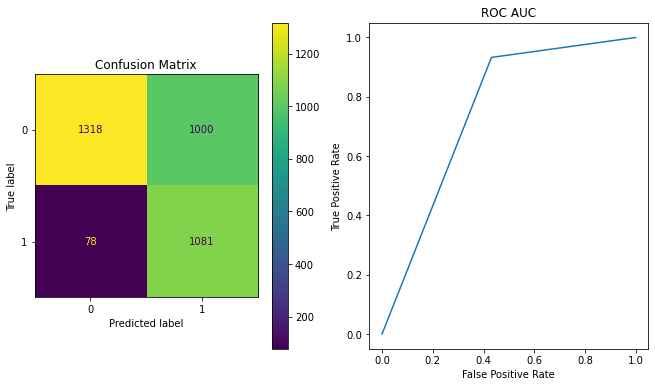

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      2318
           1       0.52      0.93      0.67      1159

    accuracy                           0.69      3477
   macro avg       0.73      0.75      0.69      3477
weighted avg       0.80      0.69      0.70      3477



In [66]:
analysis_model_with_train('decision_tree_clf_under', decision_tree_clf, x_under, y_under)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


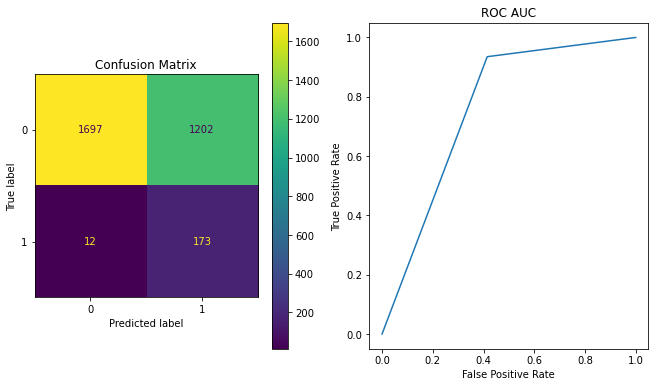

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [67]:
analysis_model_with_test('decision_tree_clf_under', decision_tree_clf, x_test, y_test)

#### Grid Search CV on Decisoin Tree

In [68]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid_parameters = {'criterion':['gini','entropy'], 'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_parameters, cv=10, scoring='f1')

In [72]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='f1')

In [73]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [74]:
grid_search.best_score_

0.6673315015814499

Accuracy Score: 0.6899626114466494
F1 Score: 0.667283950617284
Recall Score: 0.9327006039689387
Precision Score: 0.5194617972128784
ROC AUC: 0.7506471095772217


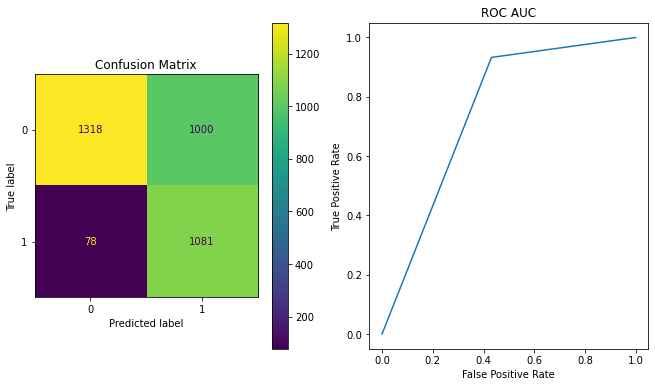

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      2318
           1       0.52      0.93      0.67      1159

    accuracy                           0.69      3477
   macro avg       0.73      0.75      0.69      3477
weighted avg       0.80      0.69      0.70      3477



In [75]:
analysis_model_with_train('decision_tree_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


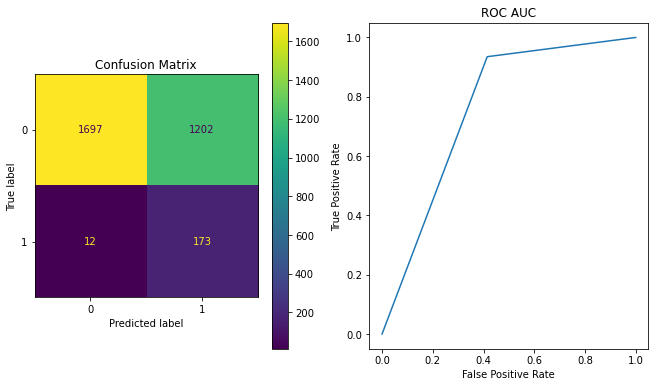

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [76]:
analysis_model_with_test('decision_tree_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

In [78]:
random_forest_clf.fit(x_under, y_under)

RandomForestClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


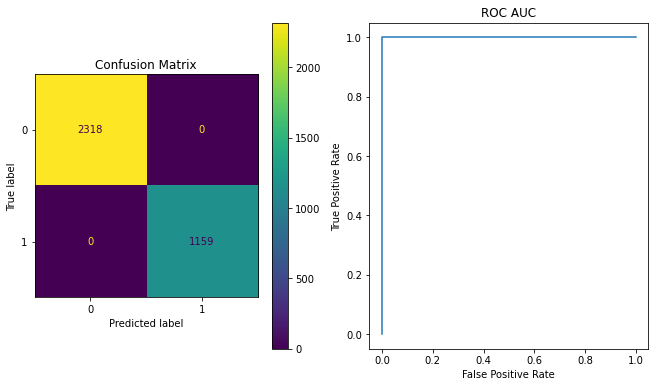

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [79]:
analysis_model_with_train('random_forest_clf_under', random_forest_clf, x_under, y_under)

Accuracy Score: 0.8651102464332037
F1 Score: 0.28522336769759454
Recall Score: 0.4486486486486487
Precision Score: 0.20906801007556675
ROC AUC: 0.6701677185982119


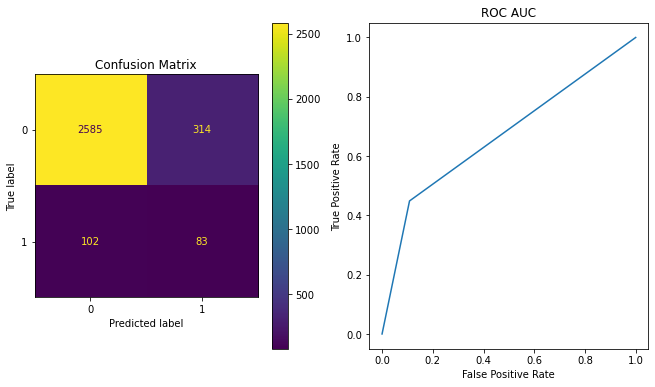

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2899
           1       0.21      0.45      0.29       185

    accuracy                           0.87      3084
   macro avg       0.59      0.67      0.61      3084
weighted avg       0.92      0.87      0.89      3084



In [80]:
analysis_model_with_test('random_forest_clf_under', random_forest_clf, x_test, y_test)

#### Grid Search CV on Random Forest

In [81]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [30]}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=5, scoring='f1')

In [82]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [30]},
             scoring='f1')

In [83]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'n_estimators': 30}

Accuracy Score: 0.997986770204199
F1 Score: 0.9969762419006479
Recall Score: 0.9956859361518551
Precision Score: 0.9982698961937716
ROC AUC: 0.9974115616911131


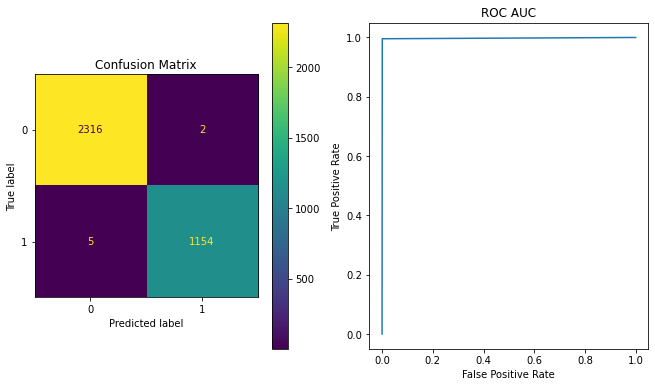

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [84]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8440337224383917
F1 Score: 0.26339969372128635
Recall Score: 0.4648648648648649
Precision Score: 0.18376068376068377
ROC AUC: 0.6665476445745504


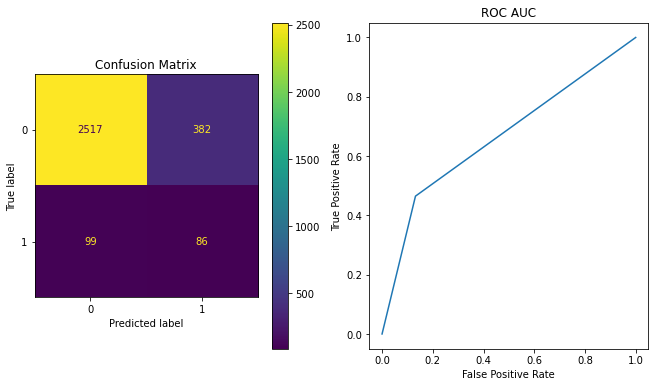

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2899
           1       0.18      0.46      0.26       185

    accuracy                           0.84      3084
   macro avg       0.57      0.67      0.59      3084
weighted avg       0.92      0.84      0.87      3084



In [85]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

In [86]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [35],
                   'class_weight': ['balanced', 'balanced_subsample']}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=10, scoring='f1')

In [87]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [35]},
             scoring='f1')

In [88]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 35}

Accuracy Score: 0.8625251653724475
F1 Score: 0.8250366032210835
Recall Score: 0.9723899913718723
Precision Score: 0.7164653528289892
ROC AUC: 0.8899913718723037


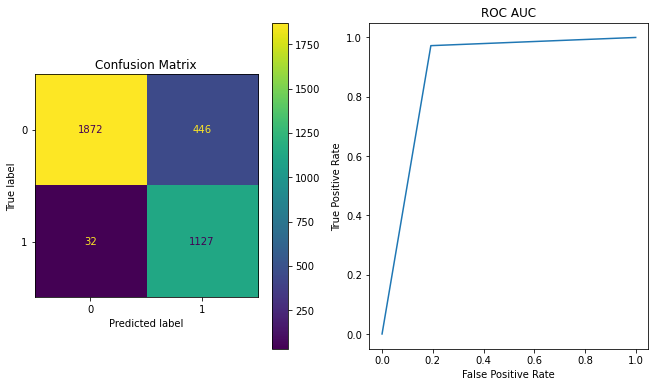

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2318
           1       0.72      0.97      0.83      1159

    accuracy                           0.86      3477
   macro avg       0.85      0.89      0.86      3477
weighted avg       0.89      0.86      0.87      3477



In [89]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.7159533073929961
F1 Score: 0.2512820512820513
Recall Score: 0.7945945945945946
Precision Score: 0.14923857868020304
ROC AUC: 0.7527646998499016


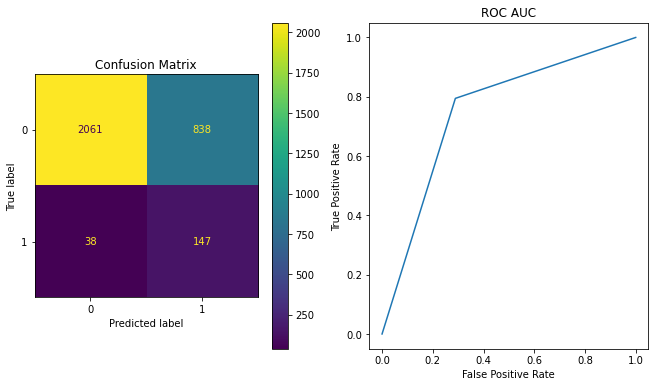

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      2899
           1       0.15      0.79      0.25       185

    accuracy                           0.72      3084
   macro avg       0.57      0.75      0.54      3084
weighted avg       0.93      0.72      0.79      3084



In [90]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Extra Trees

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier()

In [92]:
extra_trees_clf.fit(x_under, y_under)

ExtraTreesClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


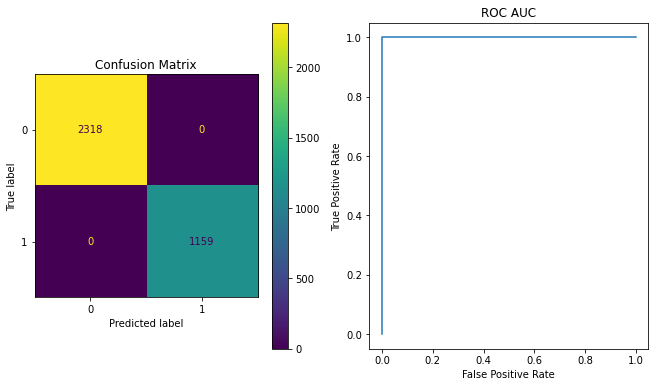

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [93]:
analysis_model_with_train('extra_trees_clf_under', extra_trees_clf, x_under, y_under)

Accuracy Score: 0.8615434500648509
F1 Score: 0.29187396351575456
Recall Score: 0.4756756756756757
Precision Score: 0.21052631578947367
ROC AUC: 0.6809216598454266


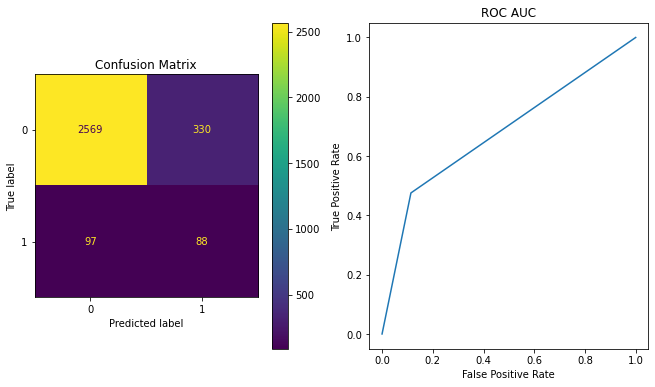

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2899
           1       0.21      0.48      0.29       185

    accuracy                           0.86      3084
   macro avg       0.59      0.68      0.61      3084
weighted avg       0.92      0.86      0.89      3084



In [94]:
analysis_model_with_test('extra_trees_clf_under', extra_trees_clf, x_test, y_test)

#### Grid Search CV on Extra Tree

In [95]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [35],
                   'class_weight': ['balanced', 'balanced_subsample']}
grid_search = GridSearchCV(estimator=extra_trees_clf, param_grid=grid_parameters, cv=10, scoring='f1')

In [96]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [35]},
             scoring='f1')

In [97]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'n_estimators': 35}

Accuracy Score: 0.9344262295081968
F1 Score: 0.9095955590800953
Recall Score: 0.9896462467644521
Precision Score: 0.8415260454878943
ROC AUC: 0.9482312338222605


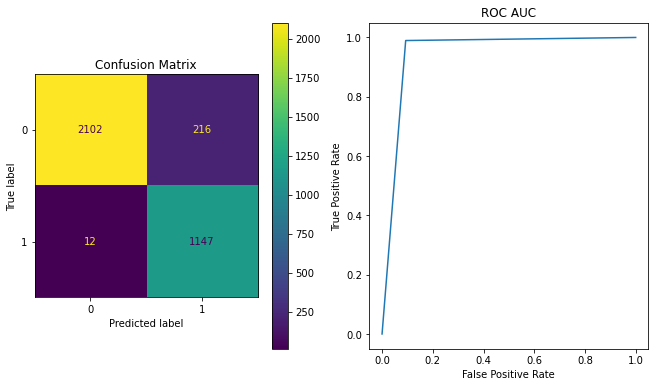

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2318
           1       0.84      0.99      0.91      1159

    accuracy                           0.93      3477
   macro avg       0.92      0.95      0.93      3477
weighted avg       0.94      0.93      0.94      3477



In [98]:
analysis_model_with_train('extra_trees_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.75810635538262
F1 Score: 0.26862745098039215
Recall Score: 0.7405405405405405
Precision Score: 0.16407185628742516
ROC AUC: 0.7498839301529884


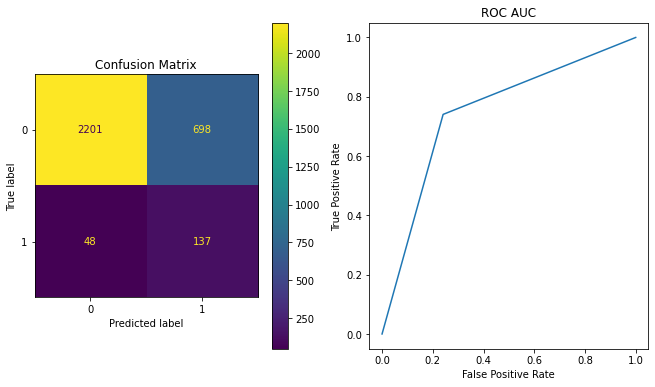

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2899
           1       0.16      0.74      0.27       185

    accuracy                           0.76      3084
   macro avg       0.57      0.75      0.56      3084
weighted avg       0.93      0.76      0.82      3084



In [99]:
analysis_model_with_test('extra_trees_clf_under', grid_search.best_estimator_, x_test, y_test)

#### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [101]:
knn_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.8559102674719585
F1 Score: 0.793742280773981
Recall Score: 0.8317515099223468
Precision Score: 0.7590551181102362
ROC AUC: 0.8498705780845556


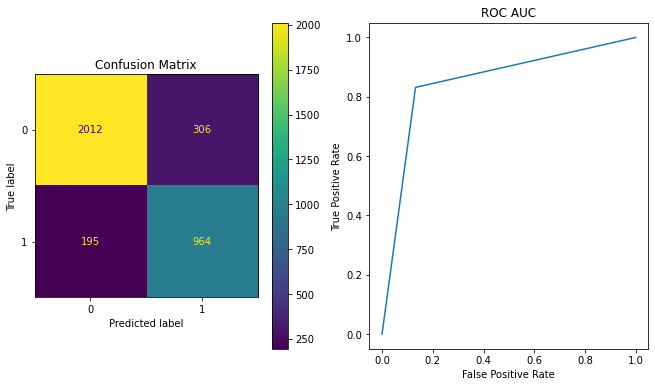

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2318
           1       0.76      0.83      0.79      1159

    accuracy                           0.86      3477
   macro avg       0.84      0.85      0.84      3477
weighted avg       0.86      0.86      0.86      3477



In [102]:
analysis_model_with_train('knn_clf_under', knn_clf, x_under, y_under)

Accuracy Score: 0.7908560311284046
F1 Score: 0.23668639053254442
Recall Score: 0.5405405405405406
Precision Score: 0.15151515151515152
ROC AUC: 0.673685240949815


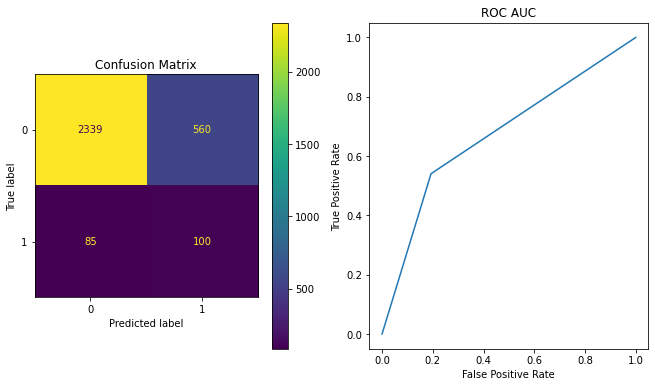

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2899
           1       0.15      0.54      0.24       185

    accuracy                           0.79      3084
   macro avg       0.56      0.67      0.56      3084
weighted avg       0.92      0.79      0.84      3084



In [103]:
analysis_model_with_test('knn_clf_under', knn_clf, x_test, y_test)

### Naive Bayes

In [104]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [105]:
gaussian_nb_clf.fit(x_under, y_under)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.6931262582686224
F1 Score: 0.6589964844998402
Recall Score: 0.8895599654874892
Precision Score: 0.5233502538071066
ROC AUC: 0.7422346850733391


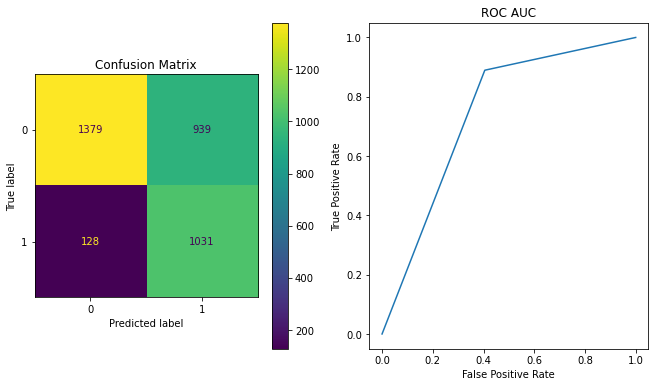

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      2318
           1       0.52      0.89      0.66      1159

    accuracy                           0.69      3477
   macro avg       0.72      0.74      0.69      3477
weighted avg       0.78      0.69      0.70      3477



In [106]:
analysis_model_with_train('gaussian_nb_clf_under', gaussian_nb_clf, x_under, y_under)

Accuracy Score: 0.6215953307392996
F1 Score: 0.21414141414141416
Recall Score: 0.8594594594594595
Precision Score: 0.12230769230769231
ROC AUC: 0.732937732489302


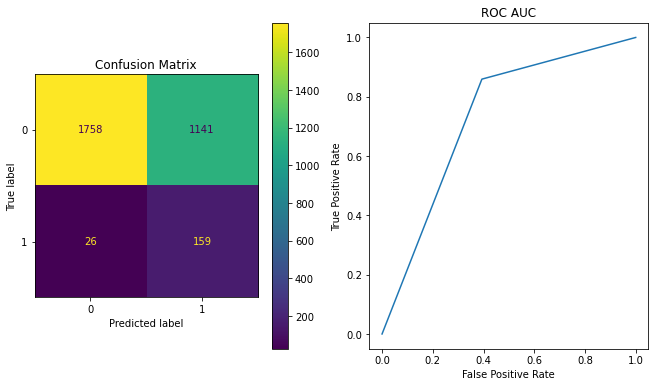

              precision    recall  f1-score   support

           0       0.99      0.61      0.75      2899
           1       0.12      0.86      0.21       185

    accuracy                           0.62      3084
   macro avg       0.55      0.73      0.48      3084
weighted avg       0.93      0.62      0.72      3084



In [107]:
analysis_model_with_test('gaussian_nb_clf_under', gaussian_nb_clf, x_test, y_test)

In [108]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
ber_nb_clf = make_pipeline(StandardScaler(), BernoulliNB())

In [109]:
ber_nb_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7411561691113029
F1 Score: 0.6137339055793992
Recall Score: 0.6169111302847282
Precision Score: 0.6105892399658411
ROC AUC: 0.7100949094046592


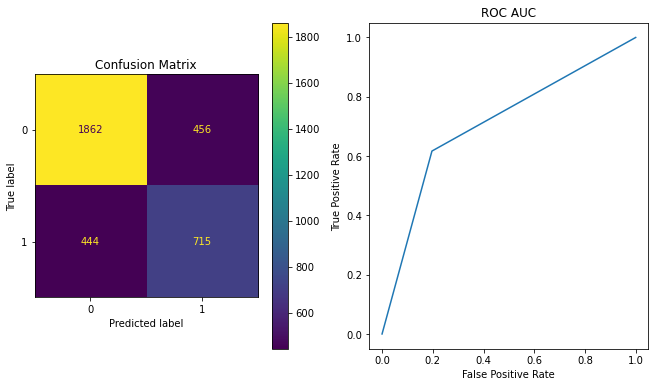

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2318
           1       0.61      0.62      0.61      1159

    accuracy                           0.74      3477
   macro avg       0.71      0.71      0.71      3477
weighted avg       0.74      0.74      0.74      3477



In [110]:
analysis_model_with_train('ber_nb_clf_under', ber_nb_clf, x_under, y_under)

Accuracy Score: 0.7801556420233463
F1 Score: 0.23303167420814475
Recall Score: 0.5567567567567567
Precision Score: 0.1473533619456366
ROC AUC: 0.675584311458751


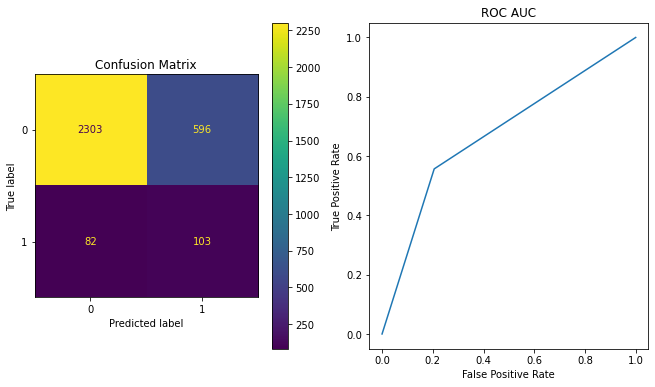

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2899
           1       0.15      0.56      0.23       185

    accuracy                           0.78      3084
   macro avg       0.56      0.68      0.55      3084
weighted avg       0.92      0.78      0.83      3084



In [111]:
analysis_model_with_test('ber_nb_clf_under', ber_nb_clf, x_test, y_test)

#### AdaBoost

In [112]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.5)

In [113]:
ada_clf.fit(x_under, y_under)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

Accuracy Score: 0.7958009778544722
F1 Score: 0.6847246891651865
Recall Score: 0.6652286453839517
Precision Score: 0.7053979871912168
ROC AUC: 0.763157894736842


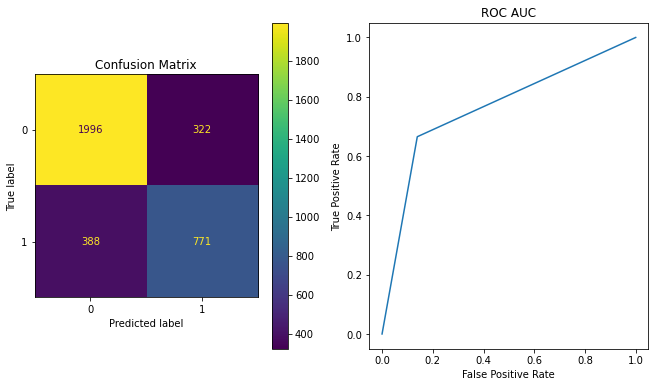

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2318
           1       0.71      0.67      0.68      1159

    accuracy                           0.80      3477
   macro avg       0.77      0.76      0.77      3477
weighted avg       0.79      0.80      0.79      3477



In [114]:
analysis_model_with_train('ada_clf_under', ada_clf, x_under, y_under)

Accuracy Score: 0.8174448767833982
F1 Score: 0.2442953020134228
Recall Score: 0.4918918918918919
Precision Score: 0.1625
ROC AUC: 0.6650559838900646


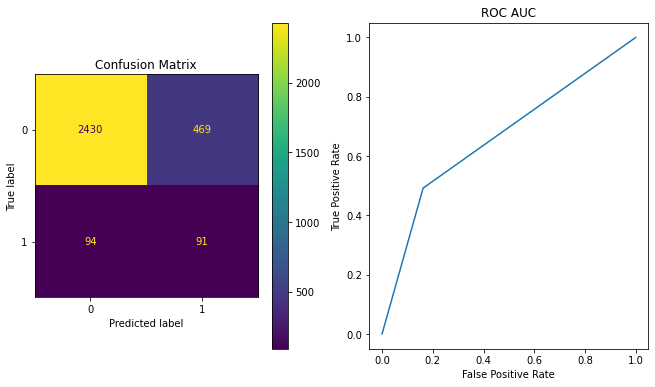

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2899
           1       0.16      0.49      0.24       185

    accuracy                           0.82      3084
   macro avg       0.56      0.67      0.57      3084
weighted avg       0.91      0.82      0.86      3084



In [115]:
analysis_model_with_test('ada_clf_under', ada_clf, x_test, y_test)

#### Grid Search CV on AdaBoost

In [116]:
grid_parameters = {'n_estimators':[300, 500, 700, 1000],
                   'learning_rate':[0.5, 1, 1.5, 2, 2.5]}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid_parameters, cv=10, scoring='f1') 

In [117]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5, 2, 2.5],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='f1')

In [118]:
grid_search.best_params_

{'learning_rate': 2, 'n_estimators': 300}

Accuracy Score: 0.6899626114466494
F1 Score: 0.667283950617284
Recall Score: 0.9327006039689387
Precision Score: 0.5194617972128784
ROC AUC: 0.7506471095772217


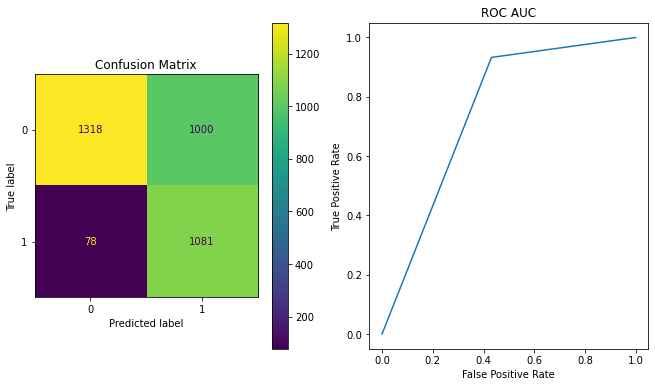

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      2318
           1       0.52      0.93      0.67      1159

    accuracy                           0.69      3477
   macro avg       0.73      0.75      0.69      3477
weighted avg       0.80      0.69      0.70      3477



In [119]:
analysis_model_with_train('ada_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


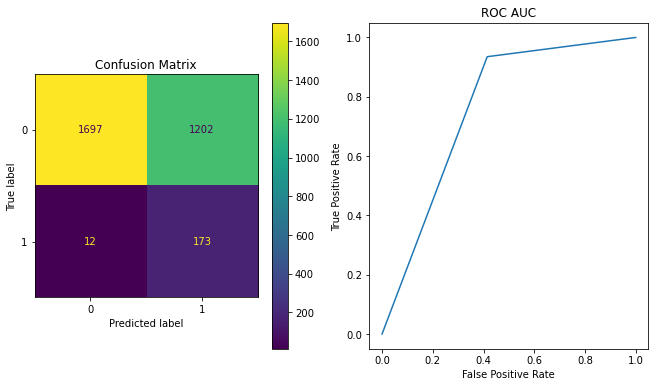

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [120]:
analysis_model_with_test('ada_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [122]:
gb_clf.fit(x_under, y_under)

GradientBoostingClassifier()

Accuracy Score: 0.8472821397756687
F1 Score: 0.7643142476697736
Recall Score: 0.7428817946505608
Precision Score: 0.7870201096892139
ROC AUC: 0.8211820534943918


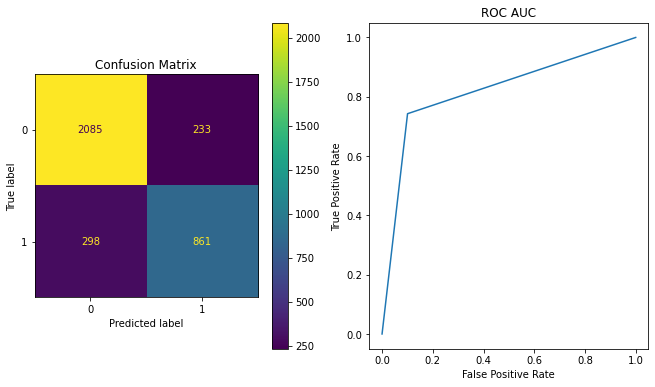

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2318
           1       0.79      0.74      0.76      1159

    accuracy                           0.85      3477
   macro avg       0.83      0.82      0.83      3477
weighted avg       0.85      0.85      0.85      3477



In [123]:
analysis_model_with_train('gb_clf_under', gb_clf, x_under, y_under)

Accuracy Score: 0.8394941634241245
F1 Score: 0.2857142857142857
Recall Score: 0.5351351351351351
Precision Score: 0.19488188976377951
ROC AUC: 0.6970260015103064


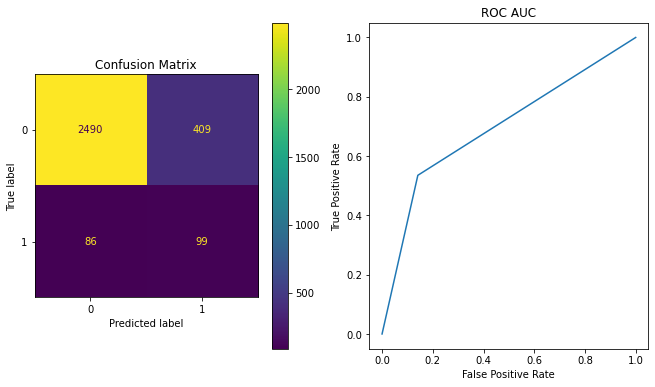

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2899
           1       0.19      0.54      0.29       185

    accuracy                           0.84      3084
   macro avg       0.58      0.70      0.60      3084
weighted avg       0.92      0.84      0.87      3084



In [124]:
analysis_model_with_test('gb_clf_under', gb_clf, x_test, y_test)

#### XG Boost

In [58]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [126]:
xgb_clf.fit(x_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.999137187230371
F1 Score: 0.9987074536837569
Recall Score: 1.0
Precision Score: 0.9974182444061962
ROC AUC: 0.9993528904227782


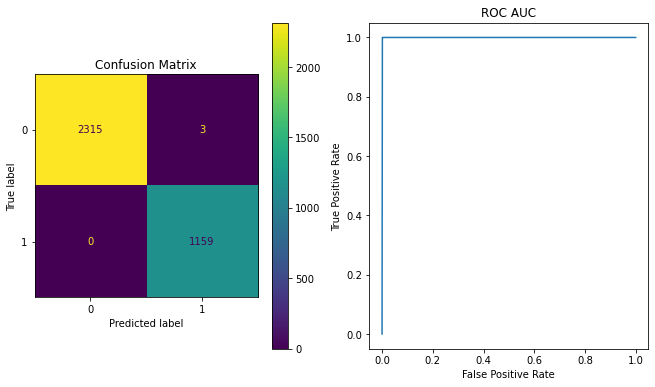

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [127]:
analysis_model_with_train('xgb_clf_under', xgb_clf, x_under, y_under)

Accuracy Score: 0.8424124513618677
F1 Score: 0.2852941176470588
Recall Score: 0.5243243243243243
Precision Score: 0.19595959595959597
ROC AUC: 0.6935178020379814


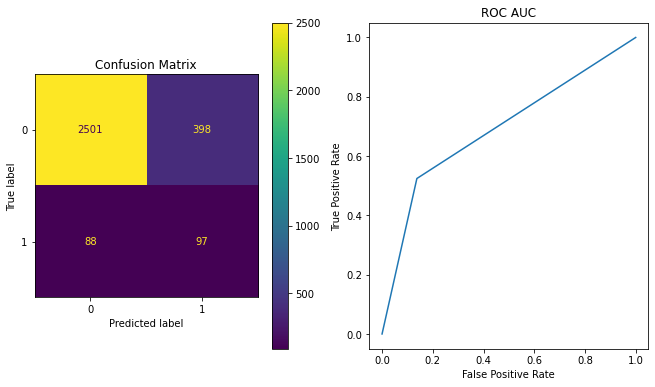

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2899
           1       0.20      0.52      0.29       185

    accuracy                           0.84      3084
   macro avg       0.58      0.69      0.60      3084
weighted avg       0.92      0.84      0.87      3084



In [128]:
analysis_model_with_test('xgb_clf_under', xgb_clf, x_test, y_test)

#### Grid Search Cv on XG Boost

In [130]:
grid_parameters = {'n_estimators':[300, 500],
                   'learning_rate':[0.5, 1, 1.5],
                   'max_depth': np.arange(2, 16)}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=grid_parameters, cv=10, scoring='f1') 

In [131]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [132]:
grid_search.best_params_

{'learning_rate': 1, 'max_depth': 13, 'n_estimators': 300}

Accuracy Score: 0.999137187230371
F1 Score: 0.9987074536837569
Recall Score: 1.0
Precision Score: 0.9974182444061962
ROC AUC: 0.9993528904227782


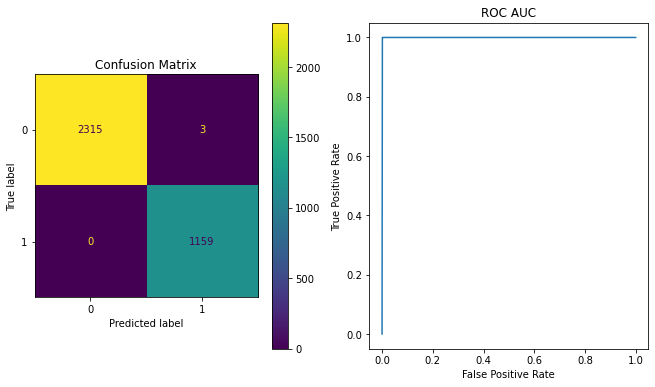

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [133]:
analysis_model_with_train('xgb_clf_under', xgb_clf, x_under, y_under)

Accuracy Score: 0.8424124513618677
F1 Score: 0.2852941176470588
Recall Score: 0.5243243243243243
Precision Score: 0.19595959595959597
ROC AUC: 0.6935178020379814


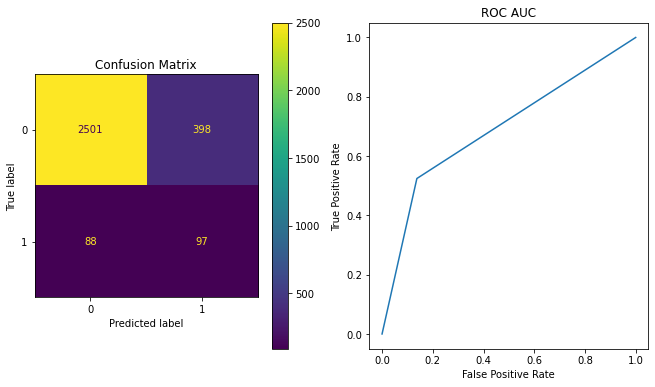

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2899
           1       0.20      0.52      0.29       185

    accuracy                           0.84      3084
   macro avg       0.58      0.69      0.60      3084
weighted avg       0.92      0.84      0.87      3084



In [134]:
analysis_model_with_test('xgb_clf_under', xgb_clf, x_test, y_test)

### Training Model with Over Sampling

In [141]:
over_sampler = SMOTE()
x_over, y_over = over_sampler.fit_resample(x_train, y_train)
print(x_over.shape, y_over.shape)

(23194, 31) (23194,)


In [142]:
y_over.value_counts()

0    11597
1    11597
Name: FraudFound_P, dtype: int64

#### Logistic Regression

In [143]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [144]:
logistic_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.8386220574286454
F1 Score: 0.8453625284032225
Recall Score: 0.8822109166163663
Precision Score: 0.8114689086294417
ROC AUC: 0.8386220574286454


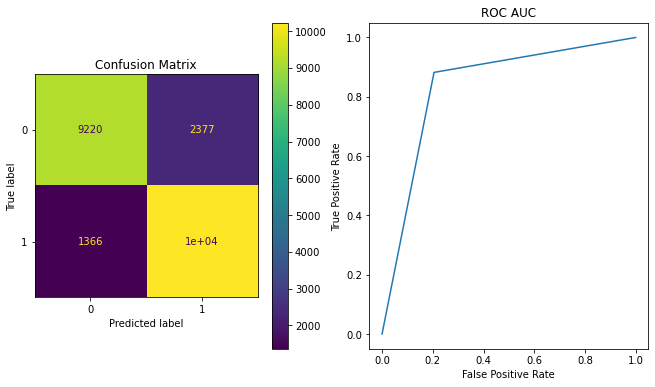

              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11597
           1       0.81      0.88      0.85     11597

    accuracy                           0.84     23194
   macro avg       0.84      0.84      0.84     23194
weighted avg       0.84      0.84      0.84     23194



In [145]:
analysis_model_with_train('logistic_model_over', logistic_model, x_over, y_over)

Accuracy Score: 0.7733463035019456
F1 Score: 0.2224694104560623
Recall Score: 0.5405405405405406
Precision Score: 0.1400560224089636
ROC AUC: 0.6643716845510568


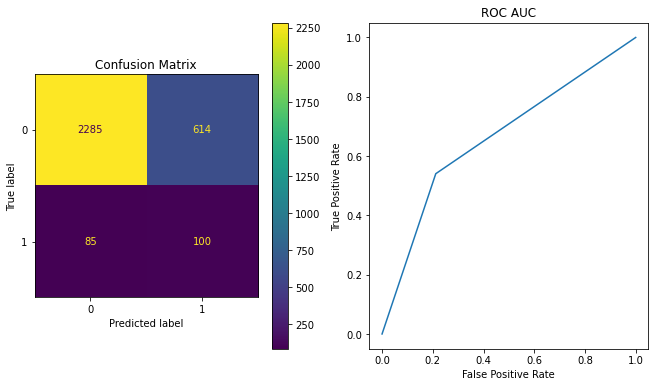

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2899
           1       0.14      0.54      0.22       185

    accuracy                           0.77      3084
   macro avg       0.55      0.66      0.54      3084
weighted avg       0.91      0.77      0.83      3084



In [146]:
analysis_model_with_test('logistic_model_over', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [147]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [148]:
linearSVC_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.8385358282314391
F1 Score: 0.8467738635898695
Recall Score: 0.8922997326894887
Precision Score: 0.805668016194332
ROC AUC: 0.8385358282314391


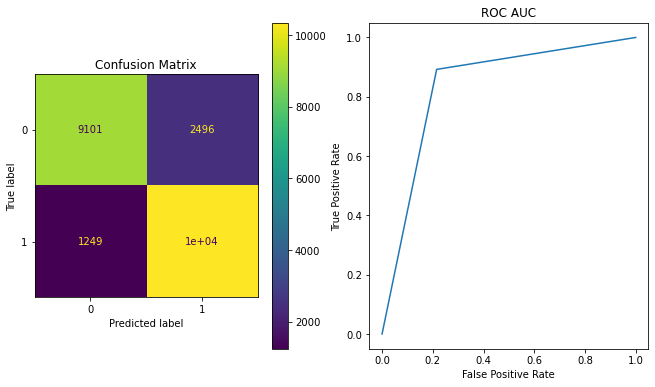

              precision    recall  f1-score   support

           0       0.88      0.78      0.83     11597
           1       0.81      0.89      0.85     11597

    accuracy                           0.84     23194
   macro avg       0.84      0.84      0.84     23194
weighted avg       0.84      0.84      0.84     23194



In [149]:
analysis_model_with_train('linearSVC_model_over', linearSVC_model, x_over, y_over)

Accuracy Score: 0.7688067444876784
F1 Score: 0.22584147665580892
Recall Score: 0.5621621621621622
Precision Score: 0.14130434782608695
ROC AUC: 0.6720779765622815


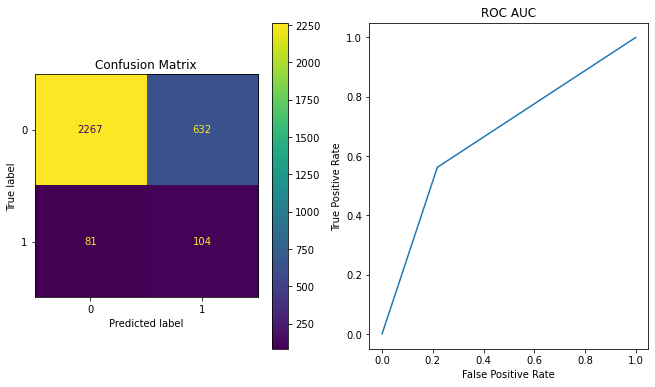

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2899
           1       0.14      0.56      0.23       185

    accuracy                           0.77      3084
   macro avg       0.55      0.67      0.54      3084
weighted avg       0.92      0.77      0.83      3084



In [150]:
analysis_model_with_test('linearSVC_model_over', linearSVC_model, x_test, y_test)

#### SVC

In [151]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=3))

In [152]:
poly_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3, kernel='poly'))])

Accuracy Score: 0.9412348021039925
F1 Score: 0.9430873940456804
Recall Score: 0.9737863240493231
Precision Score: 0.914264896373057
ROC AUC: 0.9412348021039925


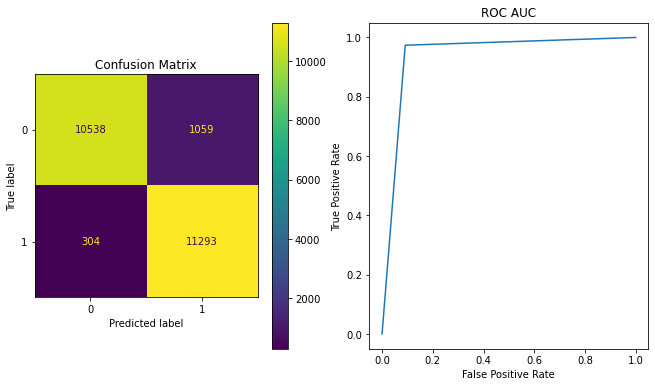

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     11597
           1       0.91      0.97      0.94     11597

    accuracy                           0.94     23194
   macro avg       0.94      0.94      0.94     23194
weighted avg       0.94      0.94      0.94     23194



In [153]:
analysis_model_with_train('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8488975356679637
F1 Score: 0.25796178343949044
Recall Score: 0.43783783783783786
Precision Score: 0.18284424379232506
ROC AUC: 0.6564835963939103


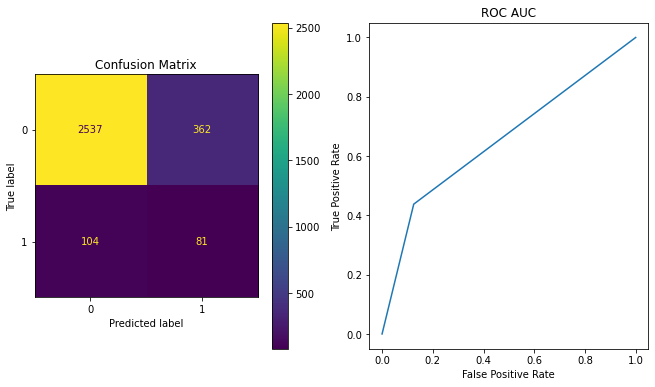

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2899
           1       0.18      0.44      0.26       185

    accuracy                           0.85      3084
   macro avg       0.57      0.66      0.59      3084
weighted avg       0.91      0.85      0.88      3084



In [154]:
analysis_model_with_test('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_test, y_test)

In [155]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))

In [156]:
rbf_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Accuracy Score: 0.9402000517375183
F1 Score: 0.9415827822937287
Recall Score: 0.9638699663706131
Precision Score: 0.9203029804050716
ROC AUC: 0.9402000517375184


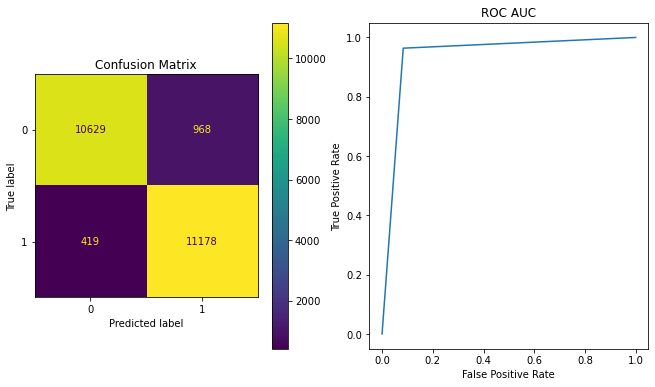

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11597
           1       0.92      0.96      0.94     11597

    accuracy                           0.94     23194
   macro avg       0.94      0.94      0.94     23194
weighted avg       0.94      0.94      0.94     23194



In [157]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8651102464332037
F1 Score: 0.2517985611510791
Recall Score: 0.3783783783783784
Precision Score: 0.18867924528301888
ROC AUC: 0.6372747359294445


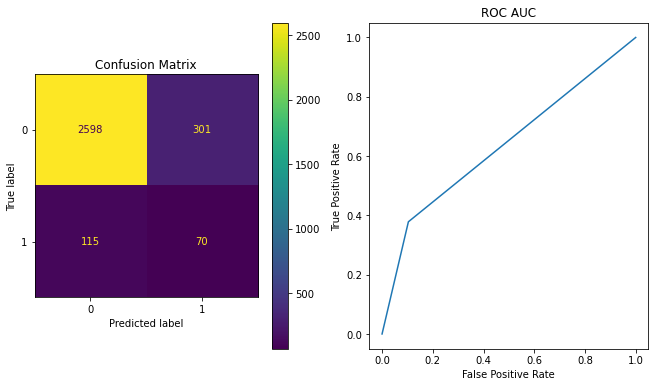

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2899
           1       0.19      0.38      0.25       185

    accuracy                           0.87      3084
   macro avg       0.57      0.64      0.59      3084
weighted avg       0.91      0.87      0.89      3084



In [158]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_test, y_test)

In [228]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))

In [229]:
sigmoid_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

Accuracy Score: 0.727429507631284
F1 Score: 0.7273119392684609
Recall Score: 0.7269983616452531
Precision Score: 0.7276257875204971
ROC AUC: 0.727429507631284


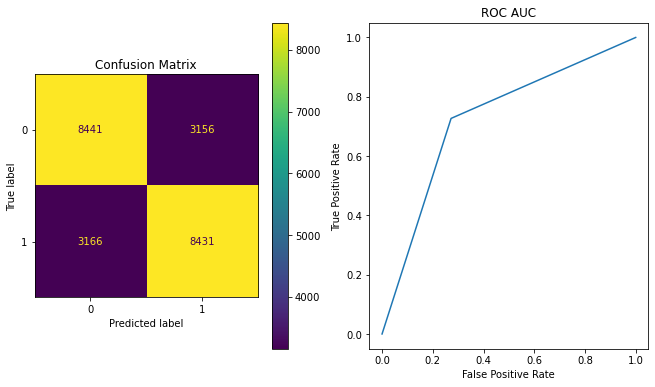

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11597
           1       0.73      0.73      0.73     11597

    accuracy                           0.73     23194
   macro avg       0.73      0.73      0.73     23194
weighted avg       0.73      0.73      0.73     23194



In [230]:
analysis_model_with_train('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.7263294422827496
F1 Score: 0.18689788053949905
Recall Score: 0.5243243243243243
Precision Score: 0.11371629542790153
ROC AUC: 0.6317723725795474


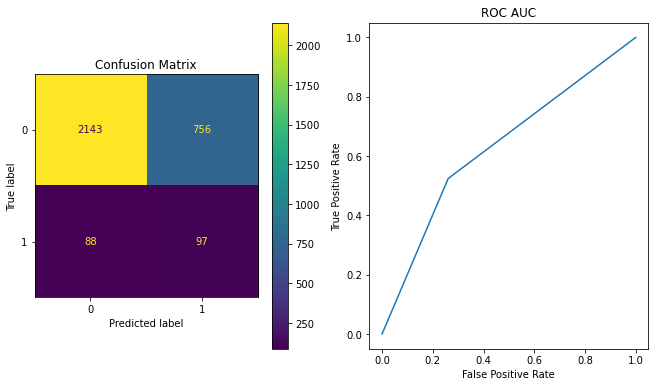

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      2899
           1       0.11      0.52      0.19       185

    accuracy                           0.73      3084
   macro avg       0.54      0.63      0.51      3084
weighted avg       0.91      0.73      0.80      3084



In [231]:
analysis_model_with_test('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_test, y_test)

#### Decision Tree

In [159]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [160]:
decision_tree_clf.fit(x_over, y_over)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.7696818142623092
F1 Score: 0.8067293777134589
Recall Score: 0.9613693196516341
Precision Score: 0.6949448357539114
ROC AUC: 0.7696818142623093


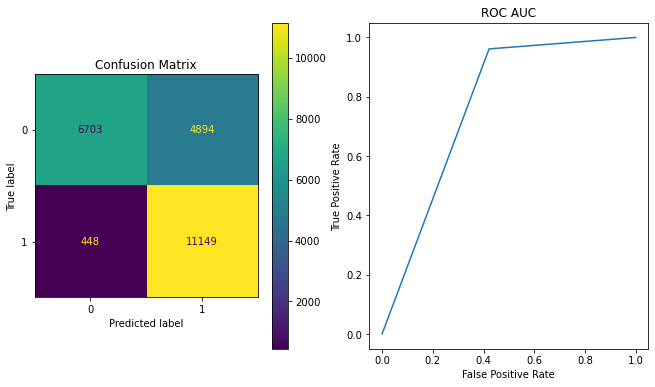

              precision    recall  f1-score   support

           0       0.94      0.58      0.72     11597
           1       0.69      0.96      0.81     11597

    accuracy                           0.77     23194
   macro avg       0.82      0.77      0.76     23194
weighted avg       0.82      0.77      0.76     23194



In [161]:
analysis_model_with_train('decision_tree_clf_over', decision_tree_clf, x_over, y_over)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


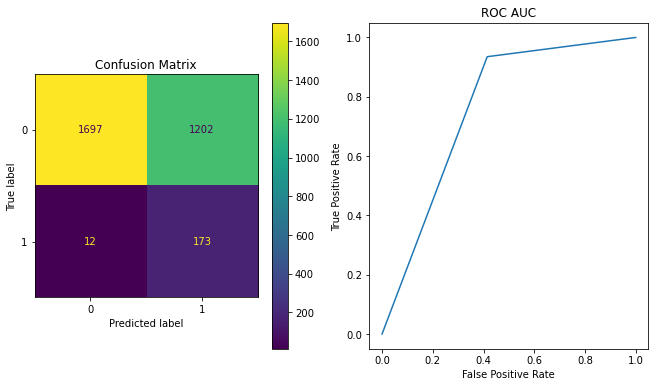

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [162]:
analysis_model_with_test('decision_tree_clf_over', decision_tree_clf, x_test, y_test)

#### Random Forest

In [163]:
random_forest_clf = RandomForestClassifier(max_depth=17)

In [164]:
random_forest_clf.fit(x_over, y_over) 

RandomForestClassifier(max_depth=17)

Accuracy Score: 0.9807708890230232
F1 Score: 0.9811288821189811
Recall Score: 0.9997413124083815
Precision Score: 0.9631968098363379
ROC AUC: 0.9807708890230232


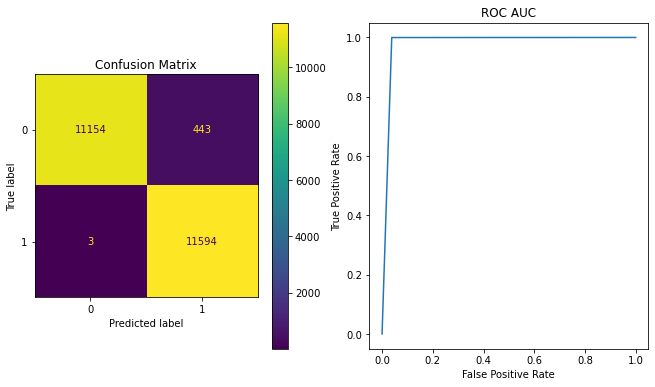

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11597
           1       0.96      1.00      0.98     11597

    accuracy                           0.98     23194
   macro avg       0.98      0.98      0.98     23194
weighted avg       0.98      0.98      0.98     23194



In [165]:
analysis_model_with_train('random_forest_clf_over', random_forest_clf, x_over, y_over)

Accuracy Score: 0.8832684824902723
F1 Score: 0.2468619246861925
Recall Score: 0.31891891891891894
Precision Score: 0.20136518771331058
ROC AUC: 0.6191007150648407


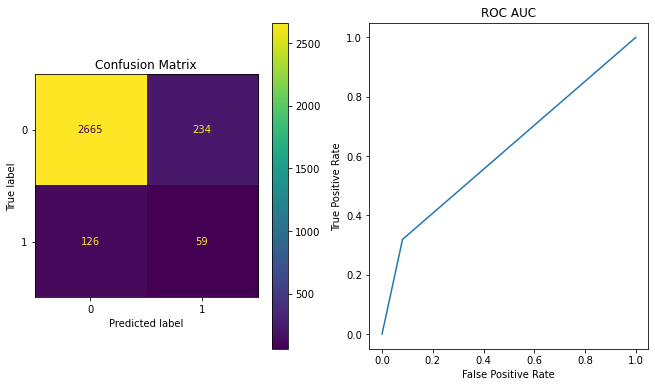

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2899
           1       0.20      0.32      0.25       185

    accuracy                           0.88      3084
   macro avg       0.58      0.62      0.59      3084
weighted avg       0.91      0.88      0.90      3084



In [166]:
analysis_model_with_test('random_forest_clf_over', random_forest_clf, x_test, y_test)

In [168]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [35],
                   'class_weight': ['balanced', 'balanced_subsample']}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_parameters, cv=10, scoring='f1')

In [169]:
grid_search.fit(x_over, y_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [35]},
             scoring='f1')

In [171]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 35}

Accuracy Score: 0.9881434853841511
F1 Score: 0.9882774201798884
Recall Score: 0.9995688540139691
Precision Score: 0.9772382397572079
ROC AUC: 0.9881434853841511


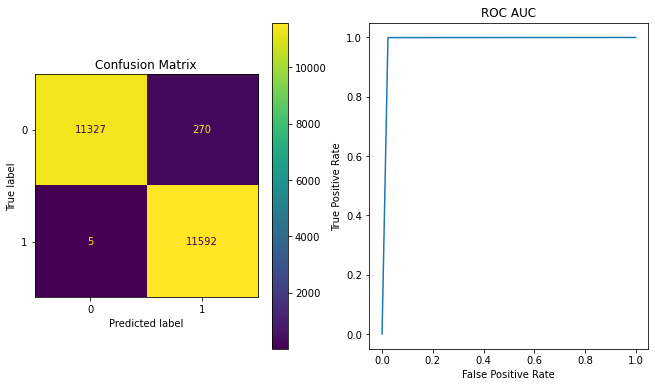

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11597
           1       0.98      1.00      0.99     11597

    accuracy                           0.99     23194
   macro avg       0.99      0.99      0.99     23194
weighted avg       0.99      0.99      0.99     23194



In [170]:
analysis_model_with_train('random_forest_clf_over', grid_search.best_estimator_, x_over, y_over)

Accuracy Score: 0.8884565499351491
F1 Score: 0.21461187214611877
Recall Score: 0.25405405405405407
Precision Score: 0.1857707509881423
ROC AUC: 0.591497534098431


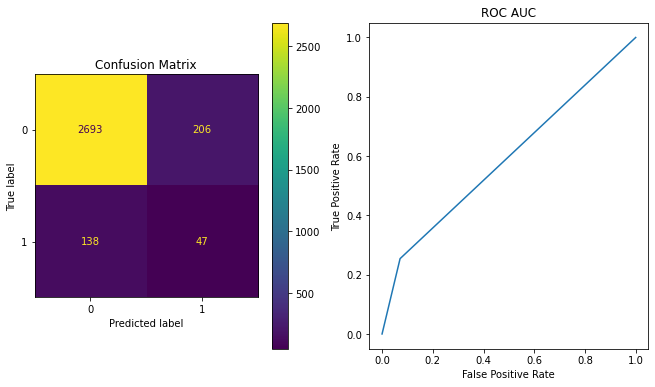

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2899
           1       0.19      0.25      0.21       185

    accuracy                           0.89      3084
   macro avg       0.57      0.59      0.58      3084
weighted avg       0.91      0.89      0.90      3084



In [172]:
analysis_model_with_test('random_forest_clf_over', grid_search.best_estimator_, x_test, y_test)

#### Extra Trees

In [173]:
extra_trees_clf = ExtraTreesClassifier(max_depth=12)

In [174]:
extra_trees_clf.fit(x_over, y_over)

ExtraTreesClassifier(max_depth=12)

Accuracy Score: 0.9255410882124687
F1 Score: 0.9294900583840281
Recall Score: 0.9815469517978788
Precision Score: 0.8826767990074442
ROC AUC: 0.9255410882124687


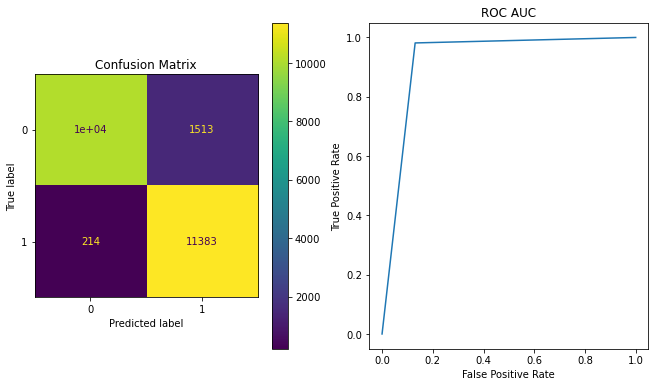

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     11597
           1       0.88      0.98      0.93     11597

    accuracy                           0.93     23194
   macro avg       0.93      0.93      0.93     23194
weighted avg       0.93      0.93      0.93     23194



In [175]:
analysis_model_with_train('extra_trees_clf_over', extra_trees_clf, x_over, y_over)

Accuracy Score: 0.819390402075227
F1 Score: 0.2680683311432326
Recall Score: 0.5513513513513514
Precision Score: 0.17708333333333334
ROC AUC: 0.693923347286576


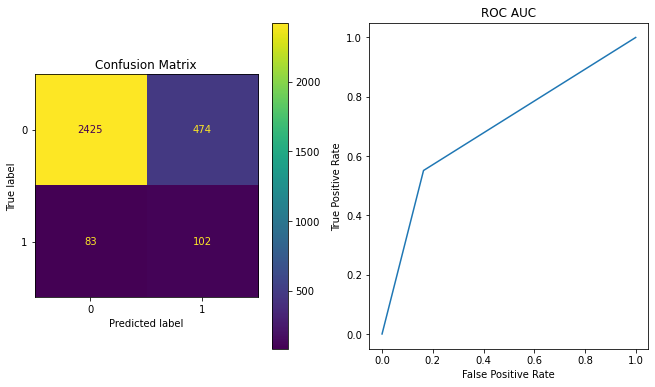

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2899
           1       0.18      0.55      0.27       185

    accuracy                           0.82      3084
   macro avg       0.57      0.69      0.58      3084
weighted avg       0.92      0.82      0.86      3084



In [176]:
analysis_model_with_test('extra_trees_clf_over', extra_trees_clf, x_test, y_test)

#### KNN

In [177]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [178]:
knn_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.9240751918599638
F1 Score: 0.9292060301507538
Recall Score: 0.996550832111753
Precision Score: 0.8703871064919415
ROC AUC: 0.9240751918599636


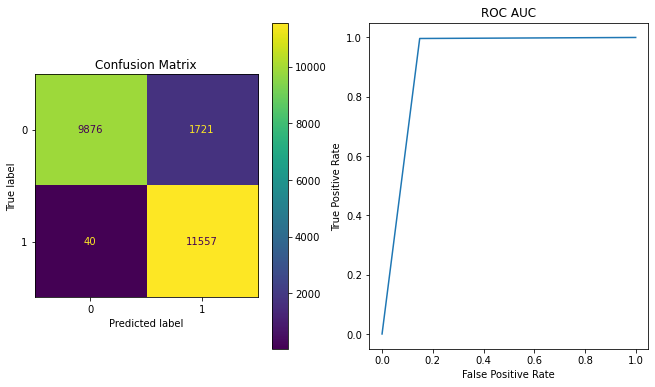

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     11597
           1       0.87      1.00      0.93     11597

    accuracy                           0.92     23194
   macro avg       0.93      0.92      0.92     23194
weighted avg       0.93      0.92      0.92     23194



In [179]:
analysis_model_with_train('knn_clf_over', knn_clf, x_over, y_over)

Accuracy Score: 0.7921530479896238
F1 Score: 0.2606689734717416
Recall Score: 0.6108108108108108
Precision Score: 0.1656891495601173
ROC AUC: 0.7072681166851571


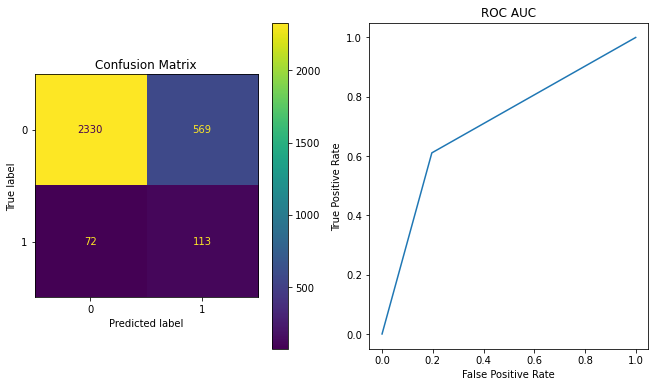

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2899
           1       0.17      0.61      0.26       185

    accuracy                           0.79      3084
   macro avg       0.57      0.71      0.57      3084
weighted avg       0.92      0.79      0.84      3084



In [180]:
analysis_model_with_test('knn_clf_over', knn_clf, x_test, y_test)

#### Naive Bayes

In [181]:
# Gaussian NB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [182]:
gaussian_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.7707596792273864
F1 Score: 0.8057149121204369
Recall Score: 0.9506768991980684
Precision Score: 0.6991122384273938
ROC AUC: 0.7707596792273864


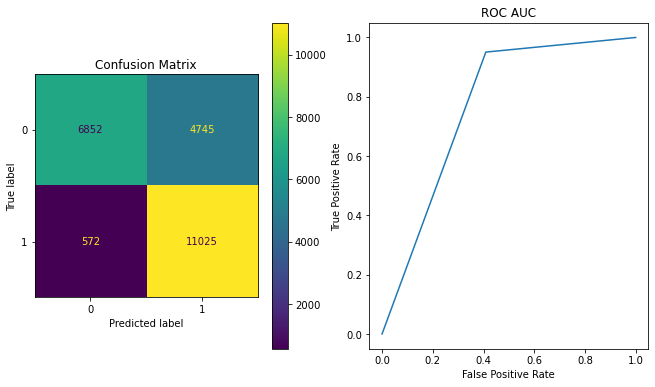

              precision    recall  f1-score   support

           0       0.92      0.59      0.72     11597
           1       0.70      0.95      0.81     11597

    accuracy                           0.77     23194
   macro avg       0.81      0.77      0.76     23194
weighted avg       0.81      0.77      0.76     23194



In [183]:
analysis_model_with_train('gaussian_nb_clf_over', gaussian_nb_clf, x_over, y_over)

Accuracy Score: 0.6070038910505836
F1 Score: 0.19947159841479525
Recall Score: 0.8162162162162162
Precision Score: 0.11361926260346125
ROC AUC: 0.7049346000018645


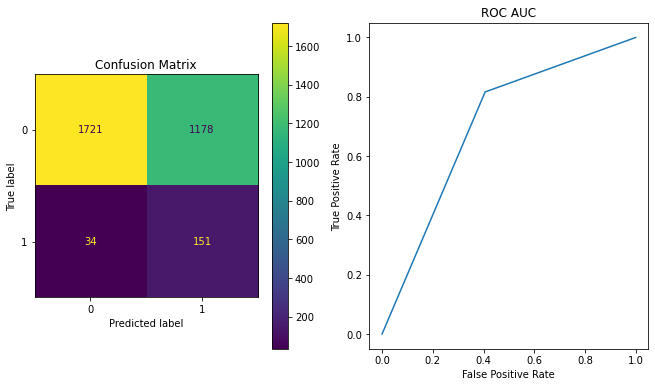

              precision    recall  f1-score   support

           0       0.98      0.59      0.74      2899
           1       0.11      0.82      0.20       185

    accuracy                           0.61      3084
   macro avg       0.55      0.70      0.47      3084
weighted avg       0.93      0.61      0.71      3084



In [184]:
analysis_model_with_test('gaussian_nb_clf_over', gaussian_nb_clf, x_test, y_test)

In [185]:
# Bernoulli NB
ber_nb_clf = make_pipeline(StandardScaler(),  BernoulliNB())

In [186]:
ber_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7846425799775804
F1 Score: 0.7926611597692084
Recall Score: 0.8233163749245495
Precision Score: 0.7642068192732512
ROC AUC: 0.7846425799775804


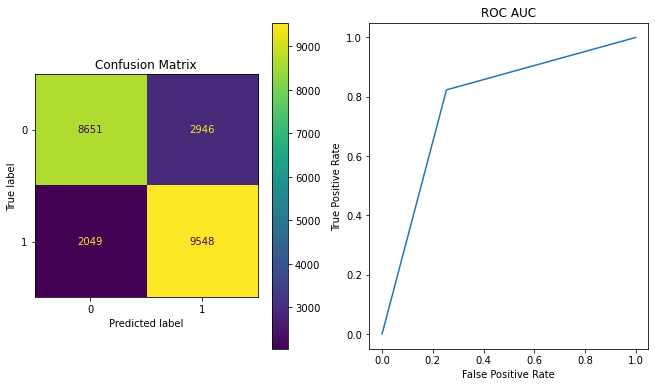

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     11597
           1       0.76      0.82      0.79     11597

    accuracy                           0.78     23194
   macro avg       0.79      0.78      0.78     23194
weighted avg       0.79      0.78      0.78     23194



In [187]:
analysis_model_with_train('ber_nb_clf_over', ber_nb_clf, x_over, y_over)

Accuracy Score: 0.7315175097276264
F1 Score: 0.2114285714285714
Recall Score: 0.6
Precision Score: 0.1283236994219653
ROC AUC: 0.6699551569506726


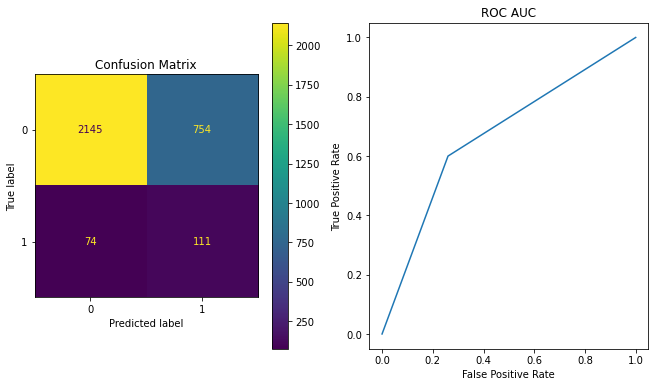

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2899
           1       0.13      0.60      0.21       185

    accuracy                           0.73      3084
   macro avg       0.55      0.67      0.52      3084
weighted avg       0.92      0.73      0.80      3084



In [188]:
analysis_model_with_test('ber_nb_clf_over', ber_nb_clf, x_test, y_test)

#### Ada Boost

In [189]:
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.5)

In [190]:
ada_clf.fit(x_over, y_over)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

Accuracy Score: 0.8908338363369837
F1 Score: 0.8943062280848222
Recall Score: 0.923687160472536
Precision Score: 0.8667367910025083
ROC AUC: 0.8908338363369837


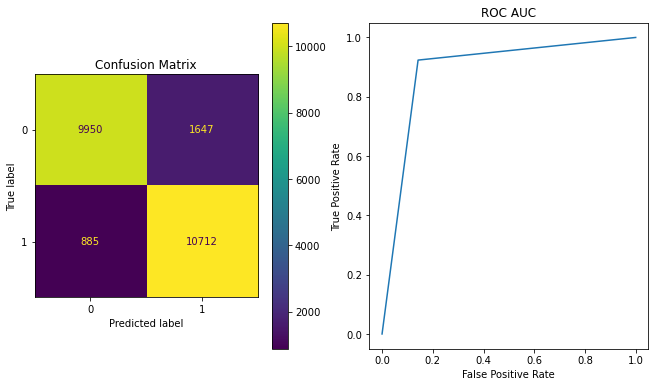

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11597
           1       0.87      0.92      0.89     11597

    accuracy                           0.89     23194
   macro avg       0.89      0.89      0.89     23194
weighted avg       0.89      0.89      0.89     23194



In [191]:
analysis_model_with_train('ada_clf_over', ada_clf, x_over, y_over)

Accuracy Score: 0.8274967574578469
F1 Score: 0.23342939481268013
Recall Score: 0.43783783783783786
Precision Score: 0.15913555992141454
ROC AUC: 0.6451003607954281


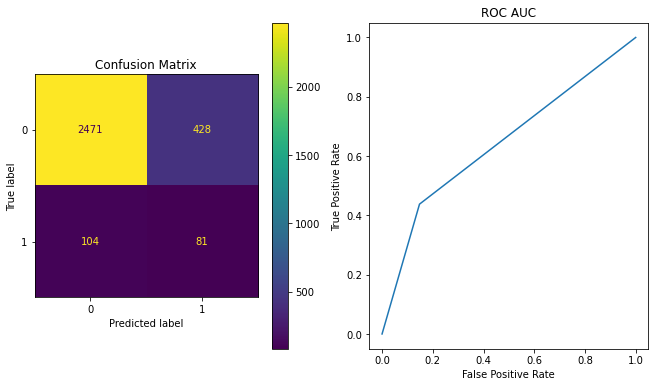

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2899
           1       0.16      0.44      0.23       185

    accuracy                           0.83      3084
   macro avg       0.56      0.65      0.57      3084
weighted avg       0.91      0.83      0.86      3084



In [192]:
analysis_model_with_test('ada_clf_over', ada_clf, x_test, y_test)

#### Gradient Boosting

In [193]:
gb_clf = GradientBoostingClassifier()

In [194]:
gb_clf.fit(x_over, y_over)

GradientBoostingClassifier()

Accuracy Score: 0.8998016728464258
F1 Score: 0.9041412308199966
Recall Score: 0.9450720013796672
Precision Score: 0.8666086819008461
ROC AUC: 0.8998016728464258


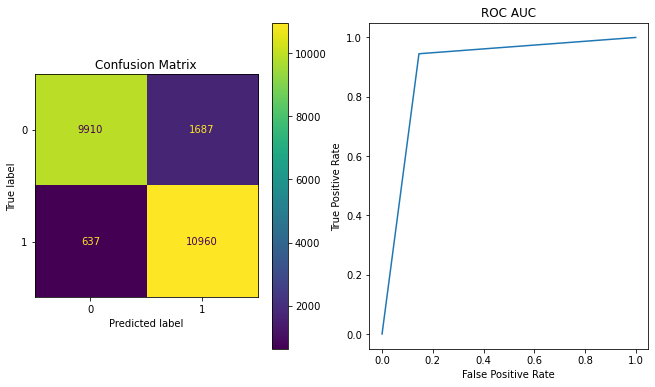

              precision    recall  f1-score   support

           0       0.94      0.85      0.90     11597
           1       0.87      0.95      0.90     11597

    accuracy                           0.90     23194
   macro avg       0.90      0.90      0.90     23194
weighted avg       0.90      0.90      0.90     23194



In [195]:
analysis_model_with_train('gb_clf_over', gb_clf, x_over, y_over)

Accuracy Score: 0.8164721141374838
F1 Score: 0.24128686327077747
Recall Score: 0.4864864864864865
Precision Score: 0.16042780748663102
ROC AUC: 0.6620083346540745


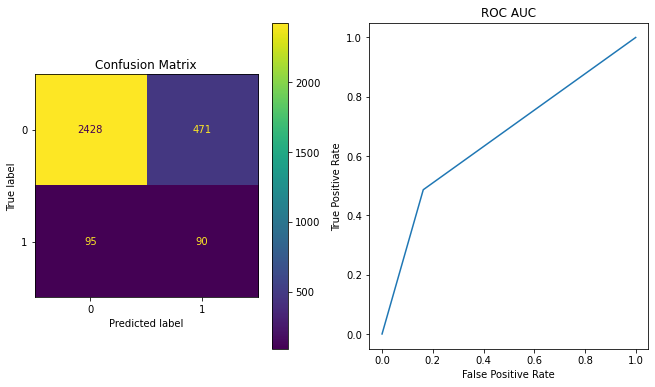

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2899
           1       0.16      0.49      0.24       185

    accuracy                           0.82      3084
   macro avg       0.56      0.66      0.57      3084
weighted avg       0.91      0.82      0.86      3084



In [196]:
analysis_model_with_test('gb_clf_over', gb_clf, x_test, y_test)

#### XG Boost

In [197]:
xgb_clf = XGBClassifier()

In [198]:
xgb_clf.fit(x_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.9875398810037078
F1 Score: 0.9875005406340556
Recall Score: 0.9843925153056825
Precision Score: 0.990628254078445
ROC AUC: 0.9875398810037079


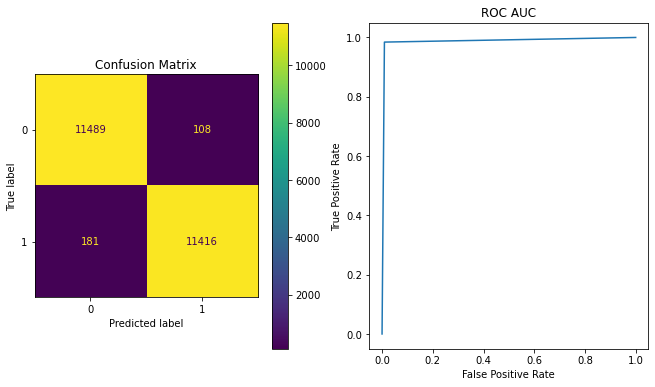

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11597
           1       0.99      0.98      0.99     11597

    accuracy                           0.99     23194
   macro avg       0.99      0.99      0.99     23194
weighted avg       0.99      0.99      0.99     23194



In [199]:
analysis_model_with_train('xgb_clf_over', xgb_clf, x_over, y_over)

Accuracy Score: 0.9189364461738002
F1 Score: 0.25595238095238104
Recall Score: 0.23243243243243245
Precision Score: 0.2847682119205298
ROC AUC: 0.5975891034186999


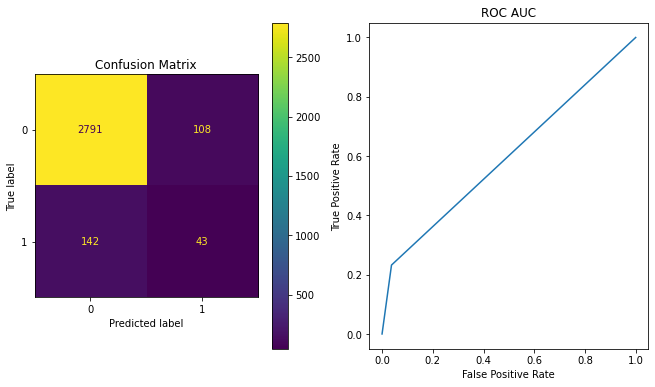

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2899
           1       0.28      0.23      0.26       185

    accuracy                           0.92      3084
   macro avg       0.62      0.60      0.61      3084
weighted avg       0.91      0.92      0.92      3084



In [200]:
analysis_model_with_test('xgb_clf_over', xgb_clf, x_test, y_test)

#### XGBoost

In [61]:
params = {'n_estimators':[300],
          'max_depth':[8],
          'learning_rate':[0.1],
          'scale_pos_weight':[25]}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=10, scoring='f1')

In [62]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [63]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'scale_pos_weight': 25}

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


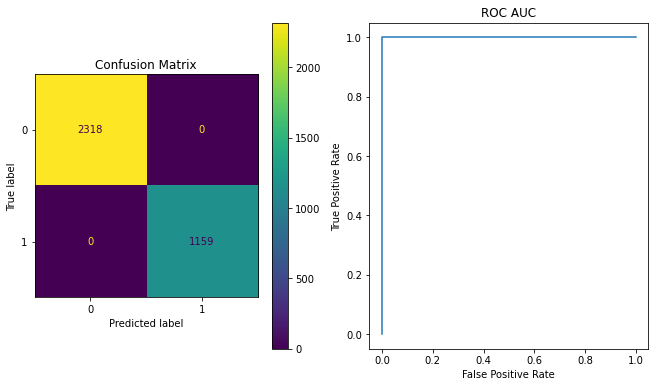

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [64]:
analysis_model_with_train('xgb_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.7558365758754864
F1 Score: 0.26822157434402333
Recall Score: 0.745945945945946
Precision Score: 0.16350710900473933
ROC AUC: 0.7512068467225418


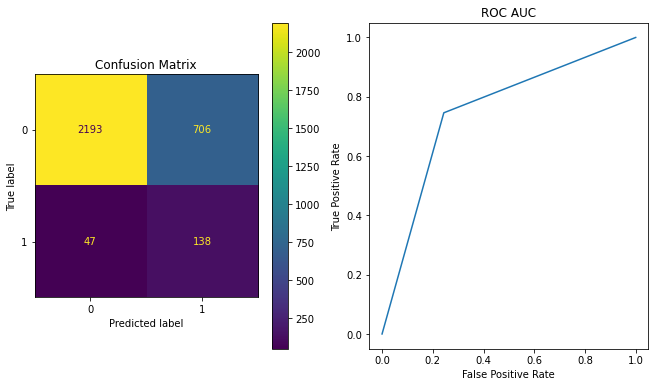

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      2899
           1       0.16      0.75      0.27       185

    accuracy                           0.76      3084
   macro avg       0.57      0.75      0.56      3084
weighted avg       0.93      0.76      0.82      3084



In [65]:
analysis_model_with_test('xgb_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [48]:
mlp.fit(x_under, y_under)

MLPClassifier()

Accuracy Score: 0.7604256542996837
F1 Score: 0.6658644203770557
Recall Score: 0.7161345987920621
Precision Score: 0.6221889055472264
ROC AUC: 0.7493528904227782


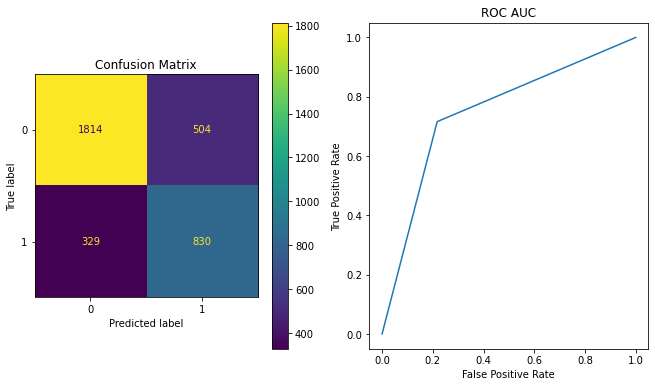

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2318
           1       0.62      0.72      0.67      1159

    accuracy                           0.76      3477
   macro avg       0.73      0.75      0.74      3477
weighted avg       0.77      0.76      0.76      3477



In [50]:
analysis_model_with_train('mlp_clf_under', mlp, x_under, y_under)

Accuracy Score: 0.7649156939040207
F1 Score: 0.23117709437963946
Recall Score: 0.5891891891891892
Precision Score: 0.1437994722955145
ROC AUC: 0.6826594445428525


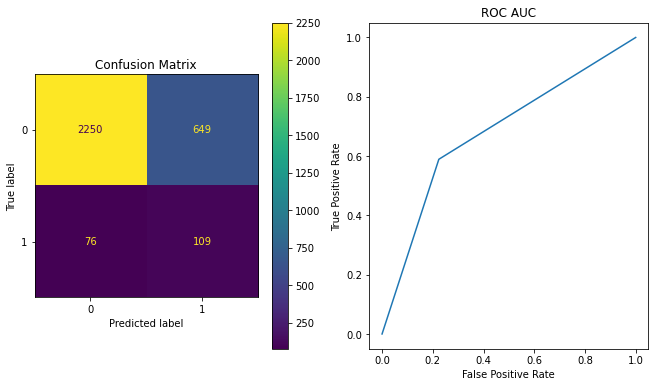

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2899
           1       0.14      0.59      0.23       185

    accuracy                           0.76      3084
   macro avg       0.56      0.68      0.55      3084
weighted avg       0.92      0.76      0.82      3084



In [51]:
analysis_model_with_test('mlp_clf_under', mlp, x_test, y_test)